# Декомпозиция временных рядов ожидаемой продолжительности жизни по странам

In [1]:
import sys
# Добавим папку с корнем проекта в список системных директорий, чтобы Python видел путь к папке utils
sys.path.append('..')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose

from utils.prepare_data import (
    get_location_codes,
    get_location_time_series,
    get_location_by_code,
)

%matplotlib inline

from warnings import simplefilter
simplefilter('ignore')

In [3]:
# Загрузим таблицу
data = pd.read_csv(
    '../data/cumulative_life_expectancy_prepared.csv'
)

Поскольку данные ожидаемой продолжительности жизни для каждой страны за 2000-2020 гг являются временными рядами, посмотрим на их декомпозицию.\
Скорее всего мы там увидим только тренд, так как за такой короткий промежуток времени вряд ли может проявится цикличность.\
Сезонности так же не ожидается, потому что данные фиксируются за год.

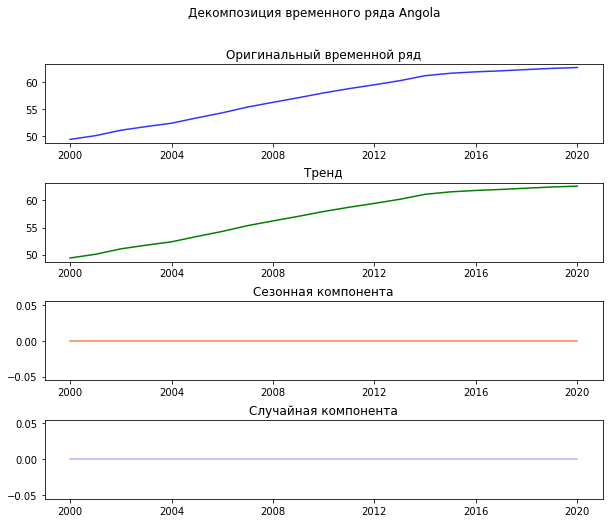

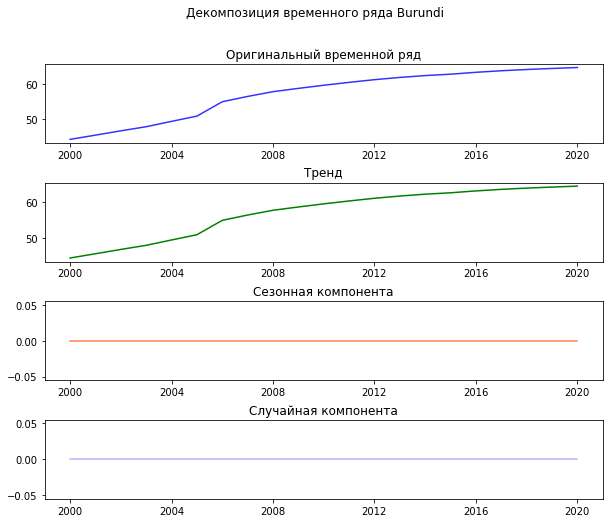

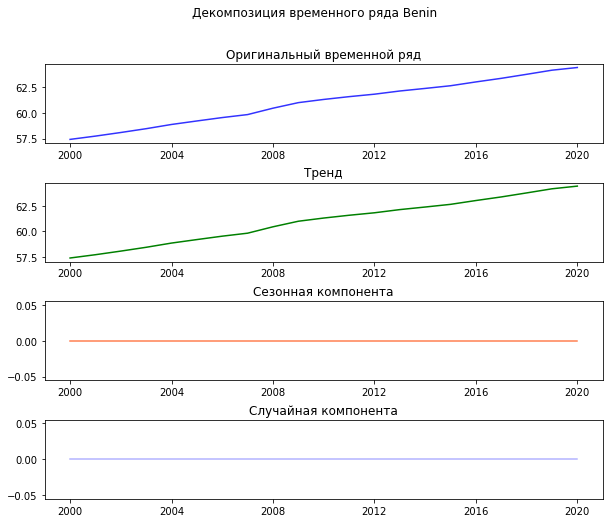

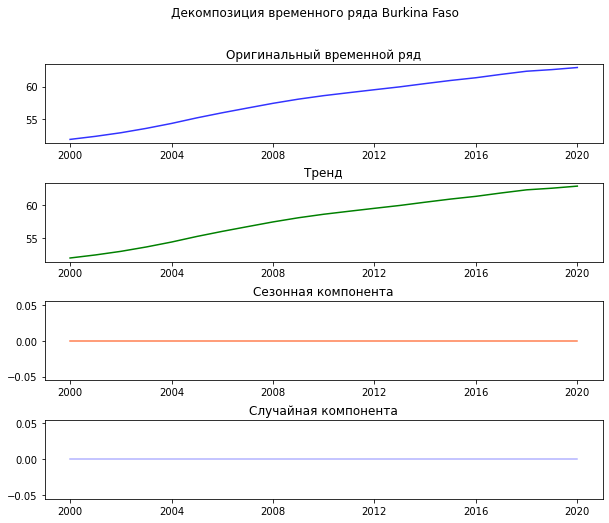

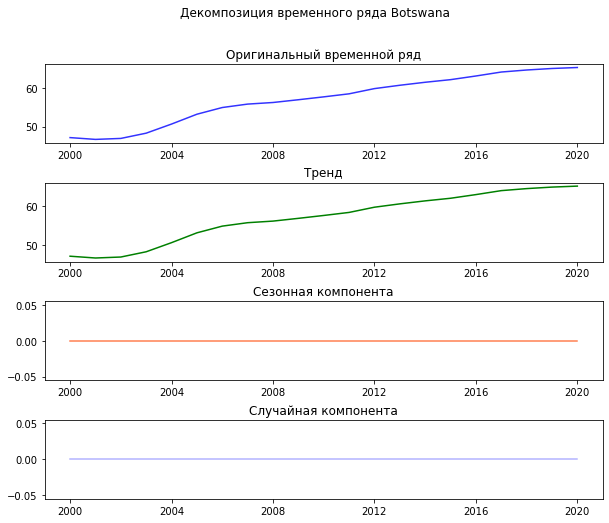

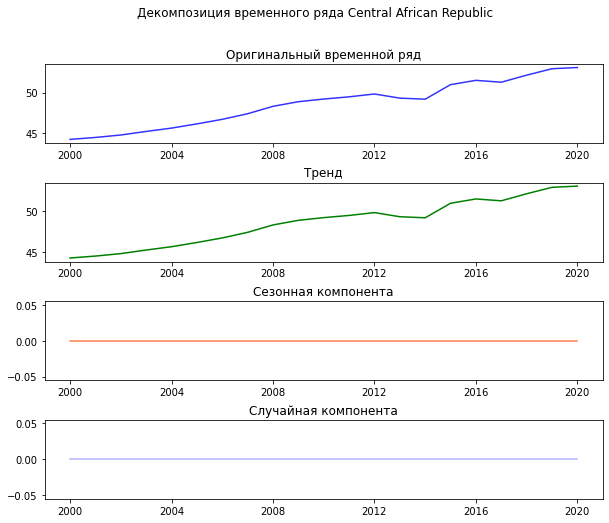

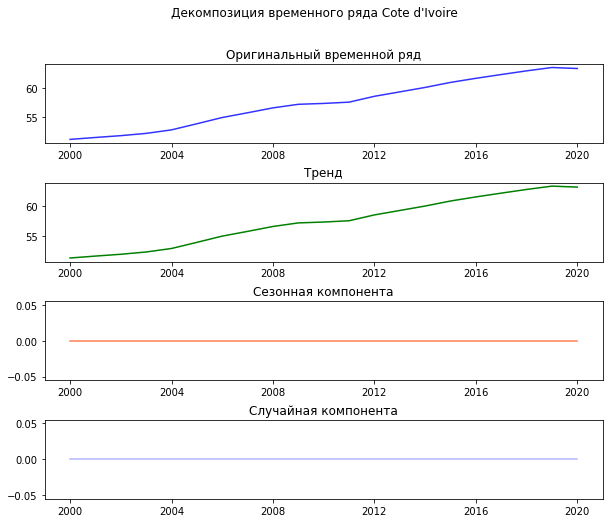

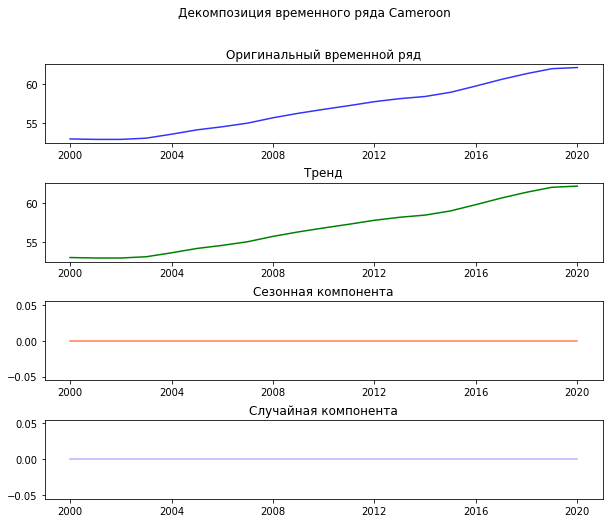

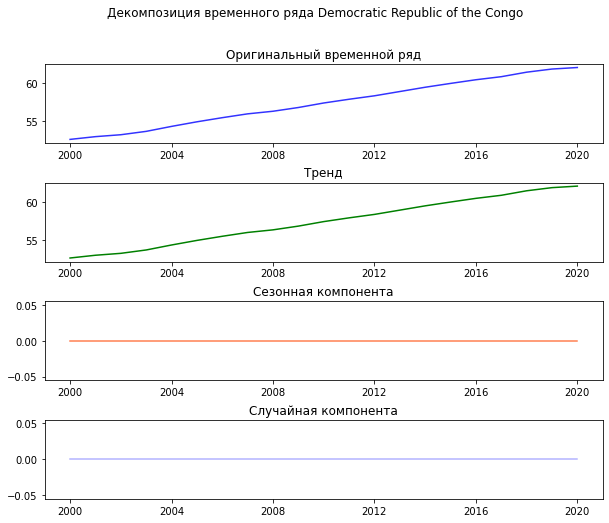

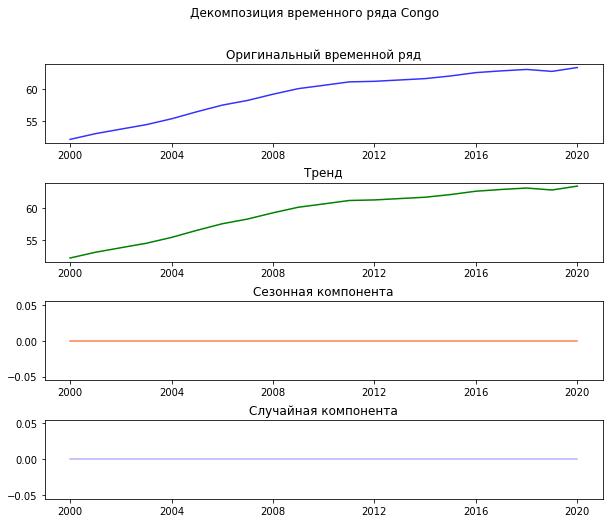

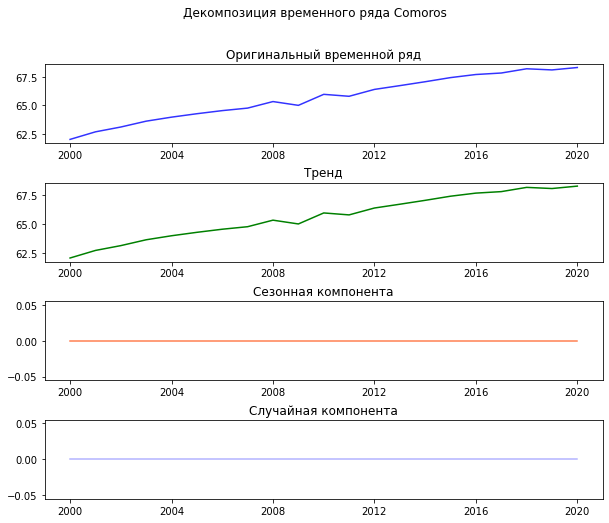

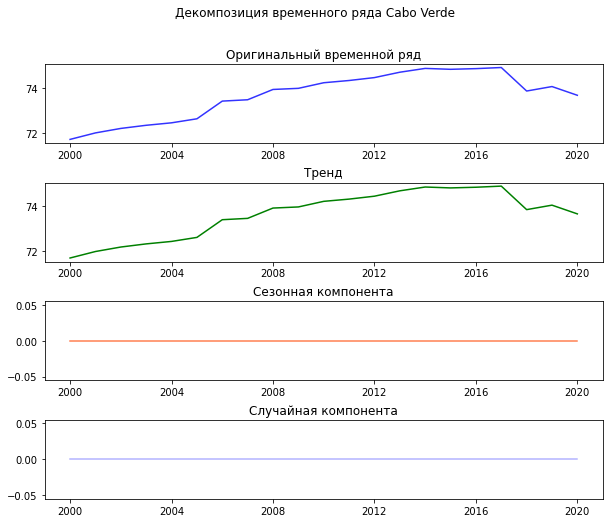

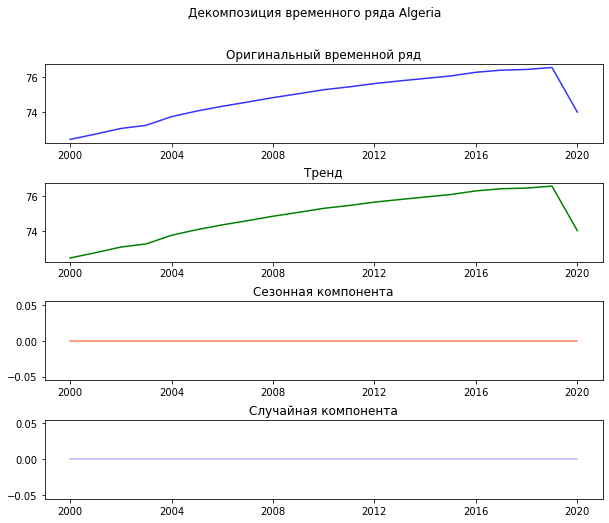

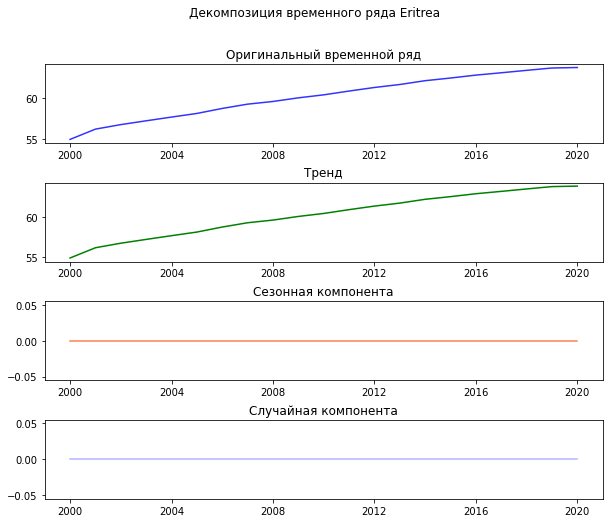

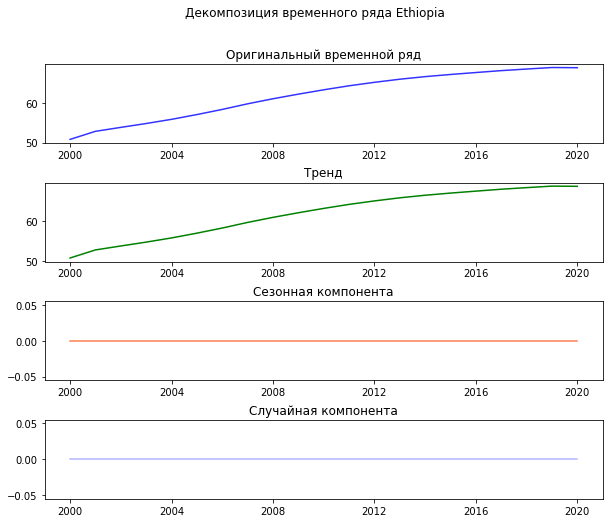

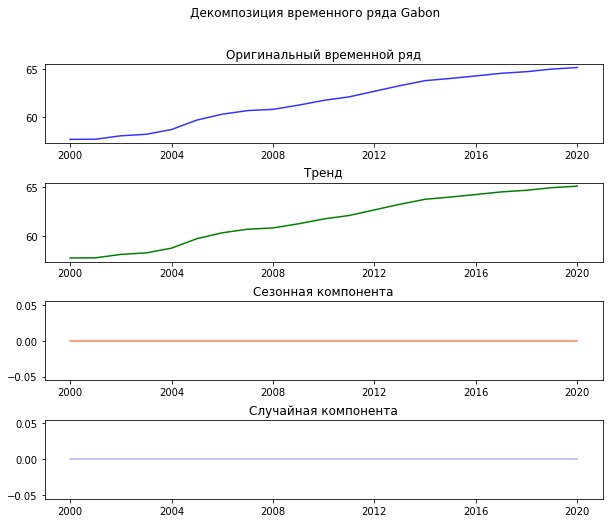

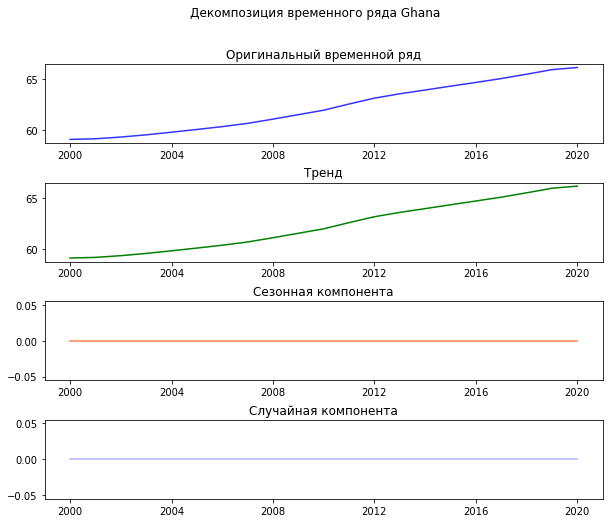

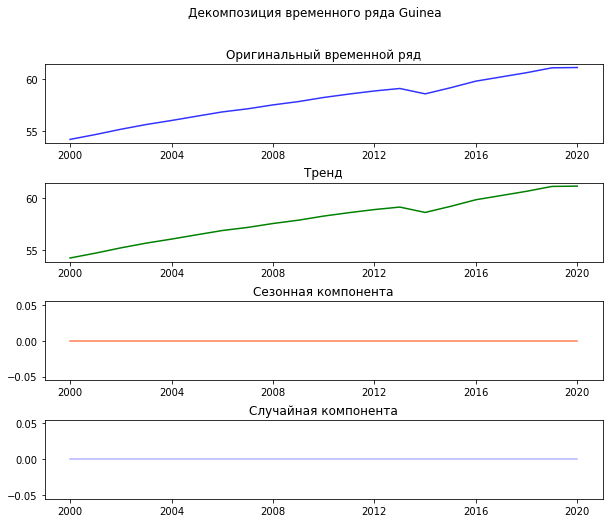

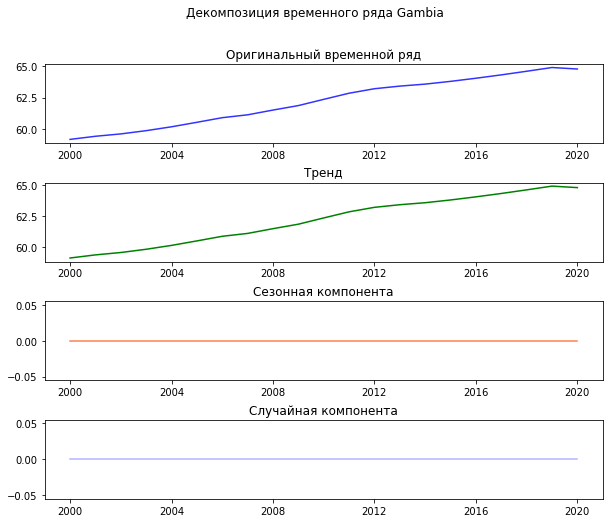

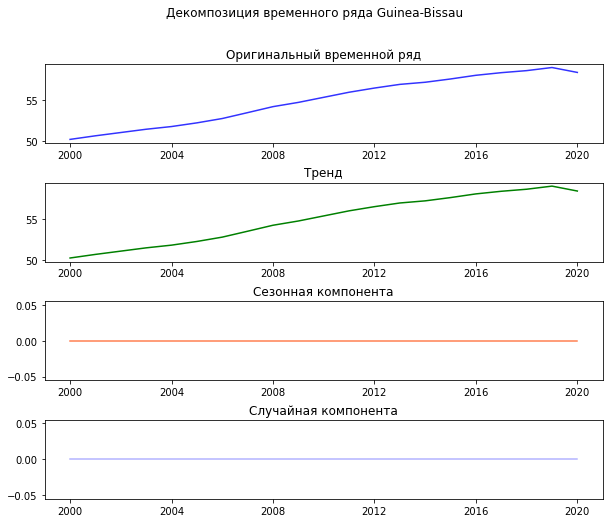

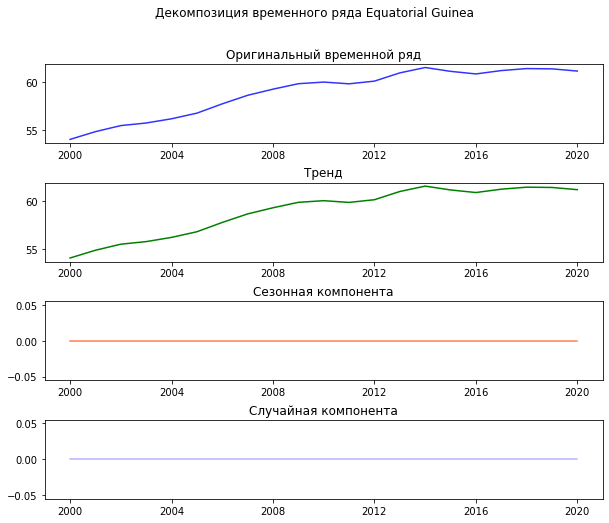

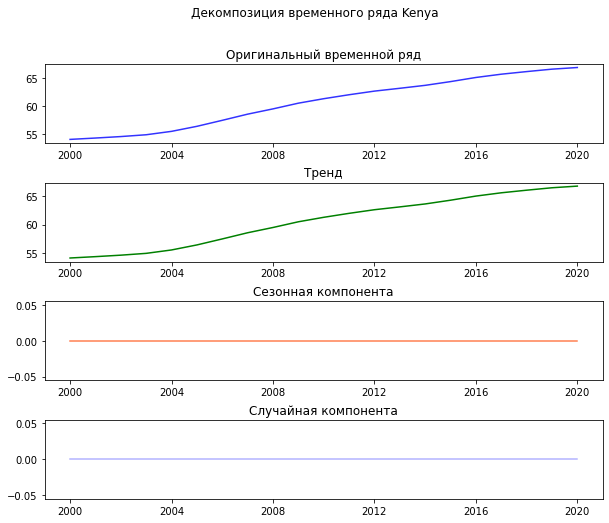

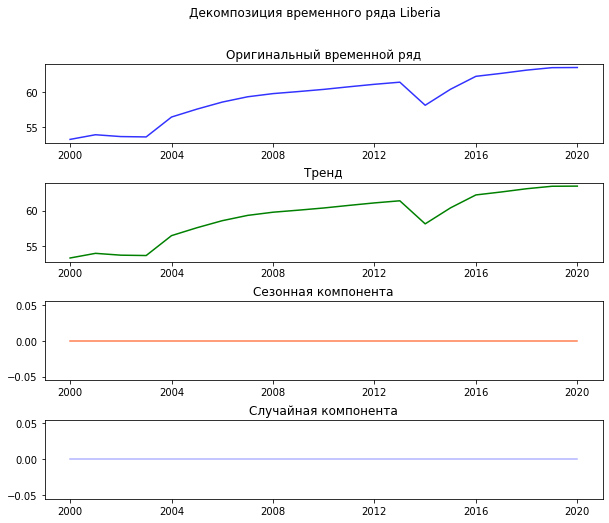

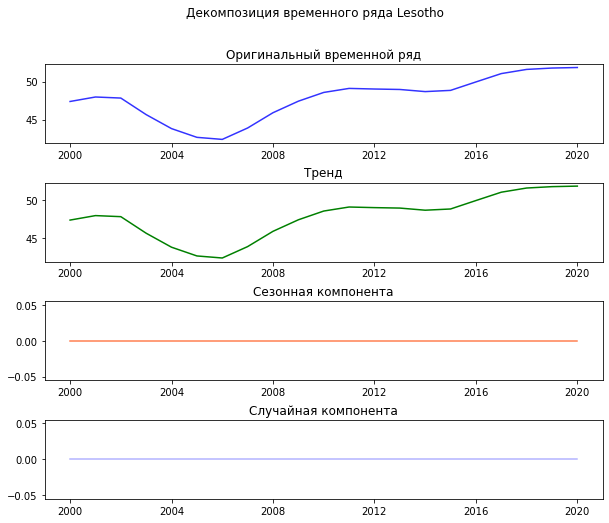

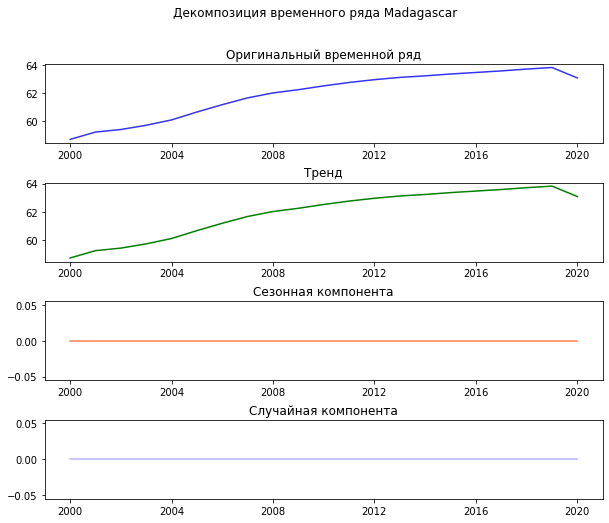

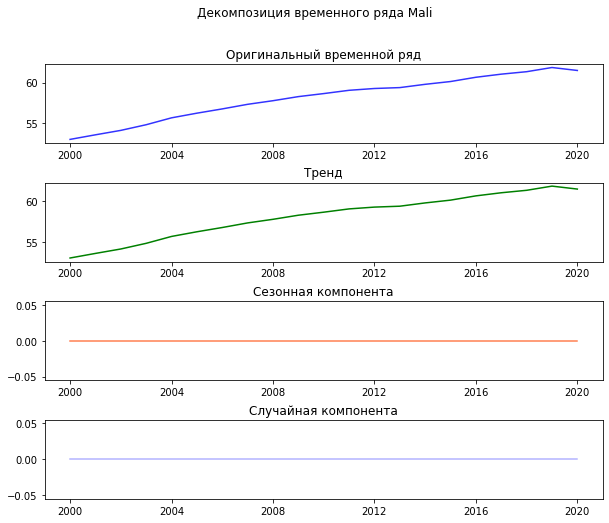

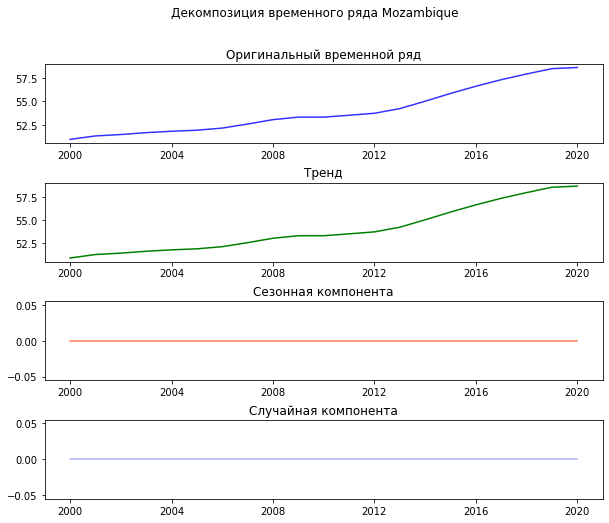

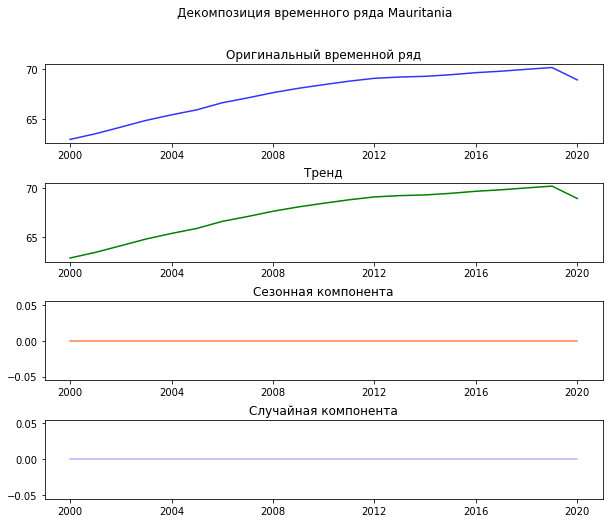

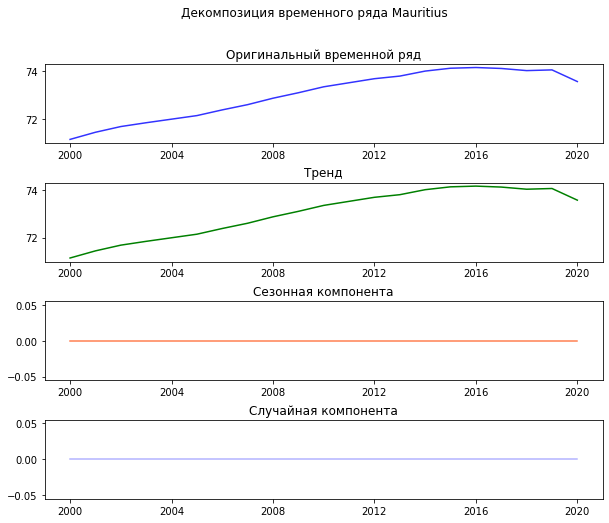

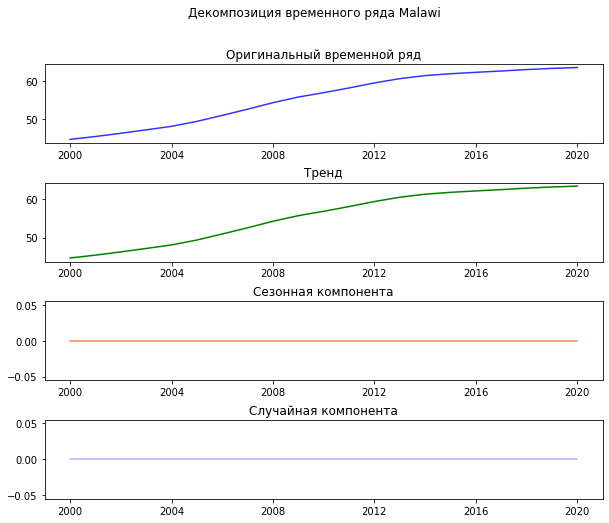

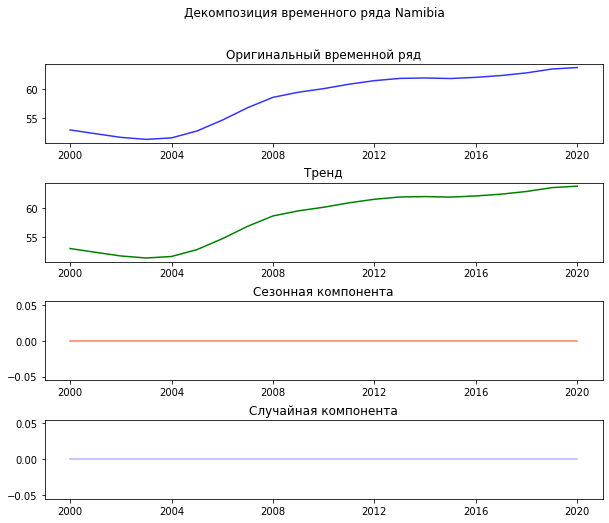

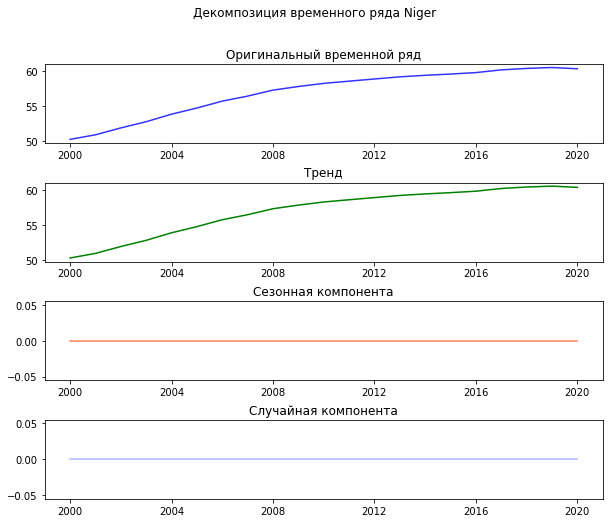

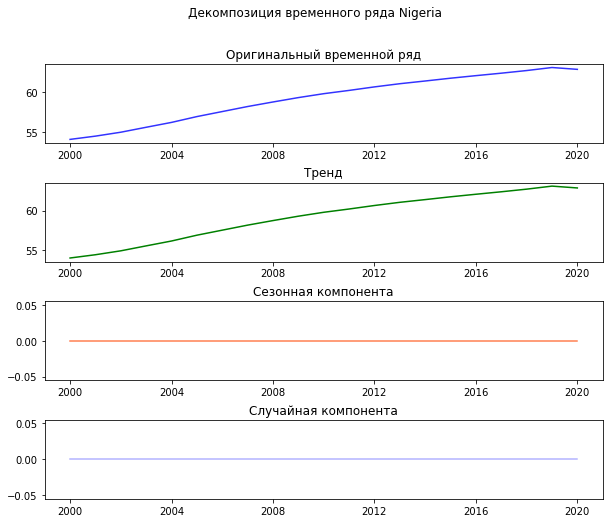

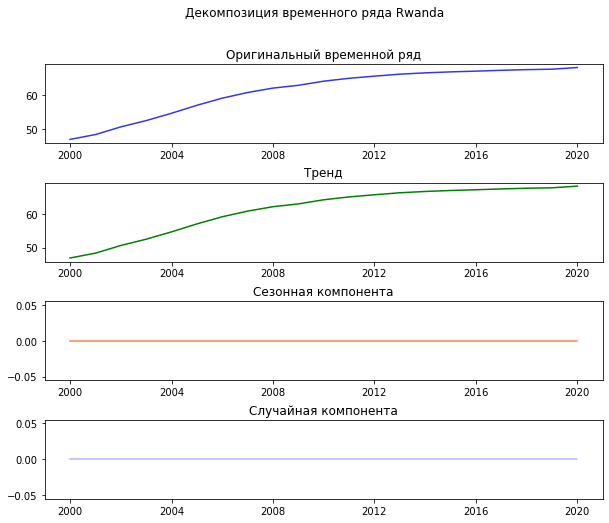

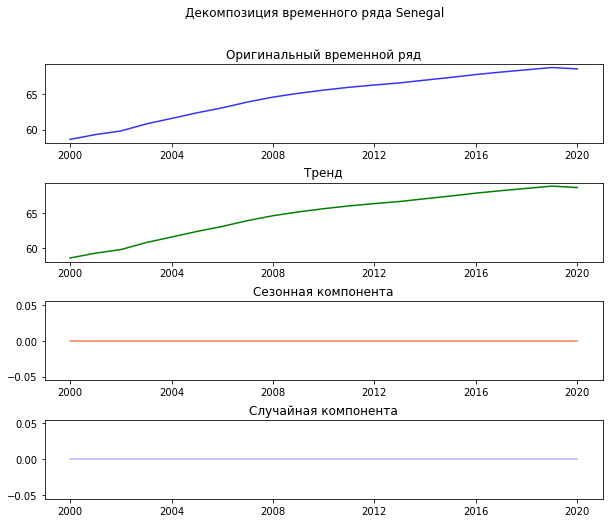

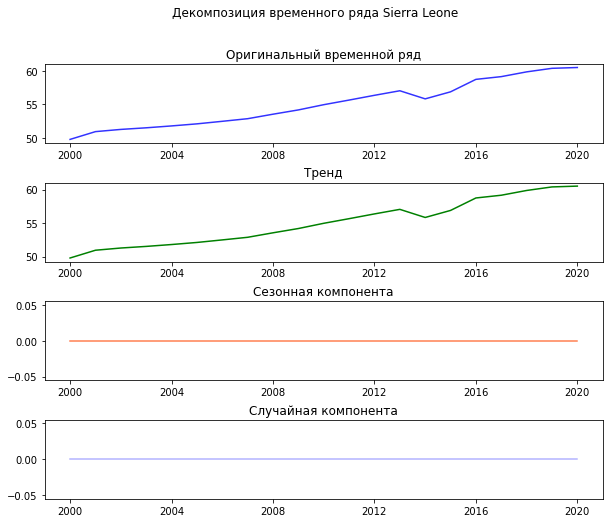

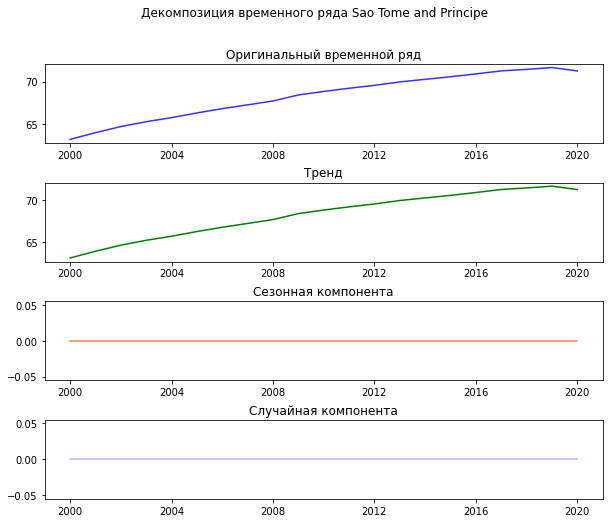

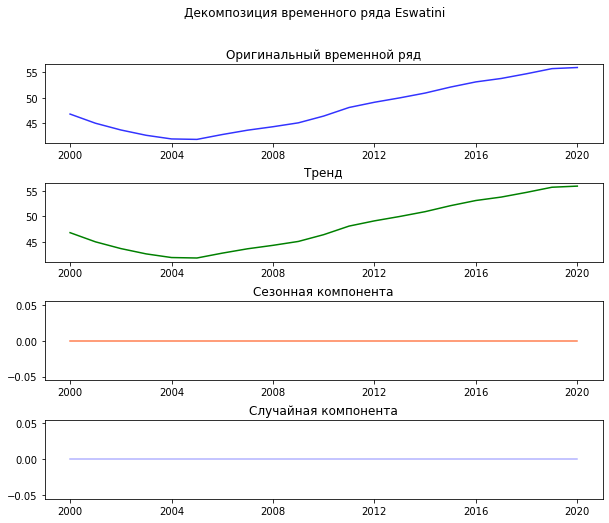

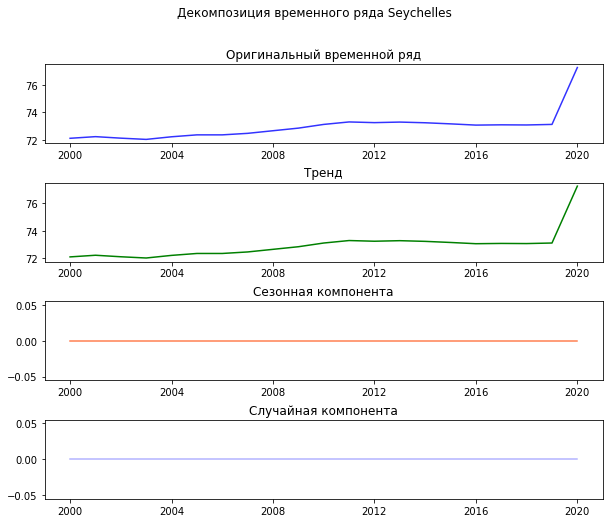

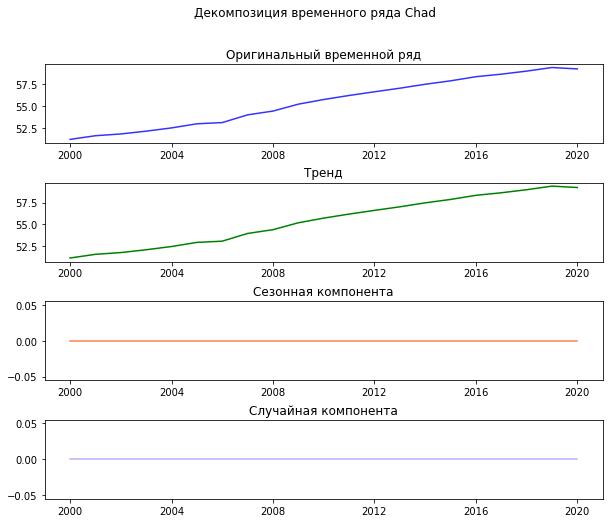

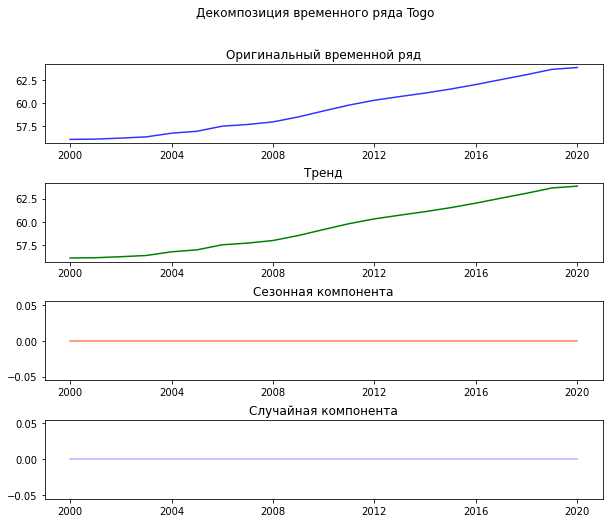

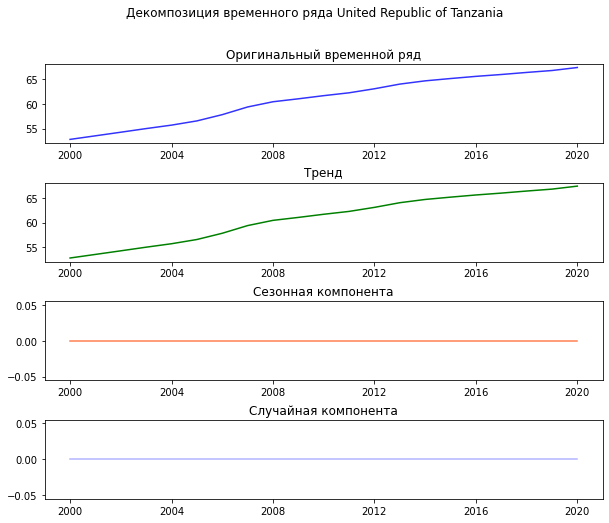

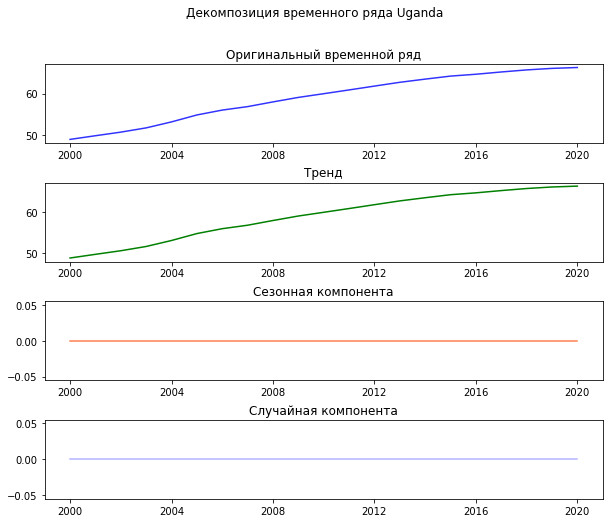

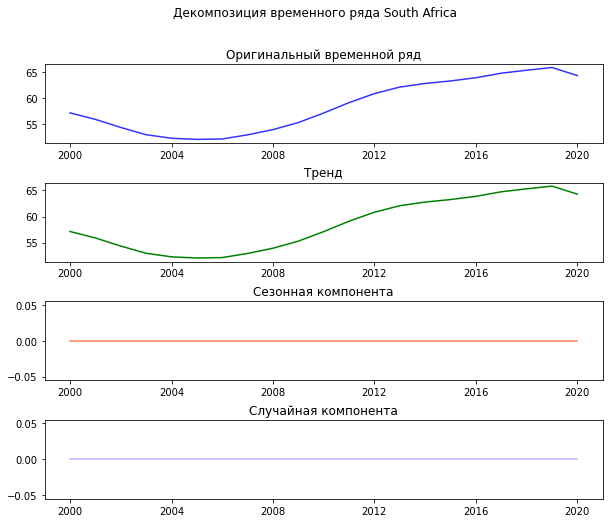

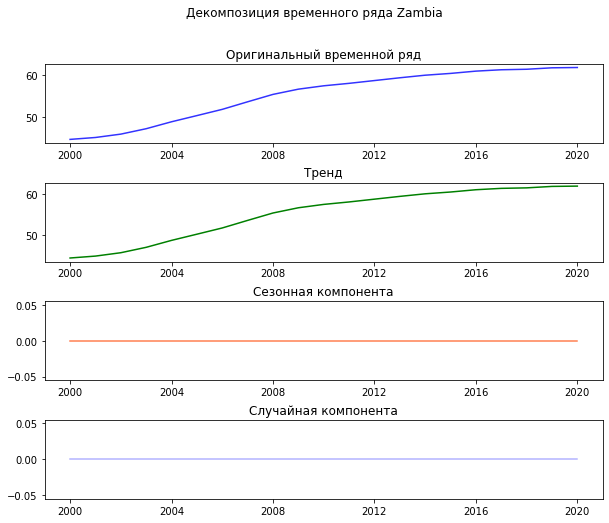

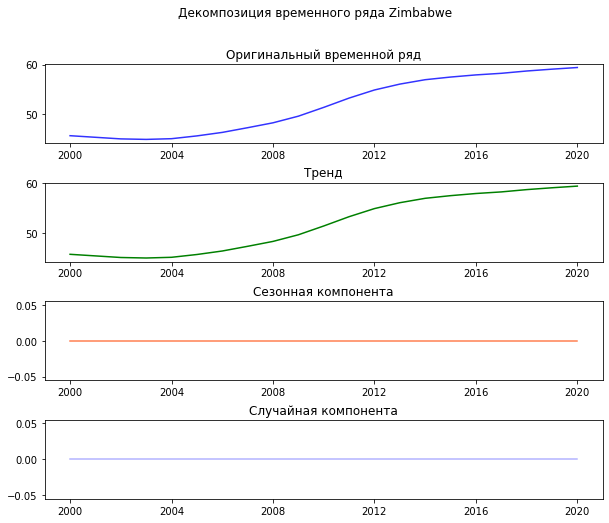

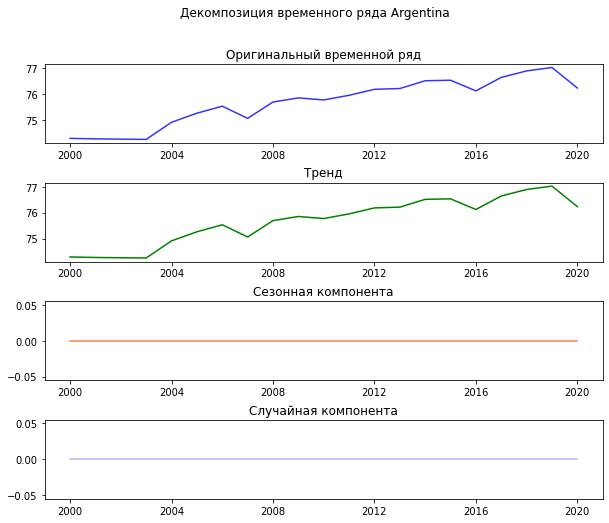

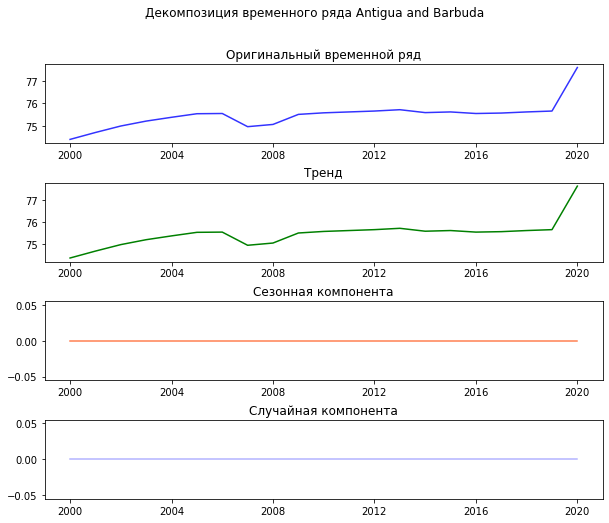

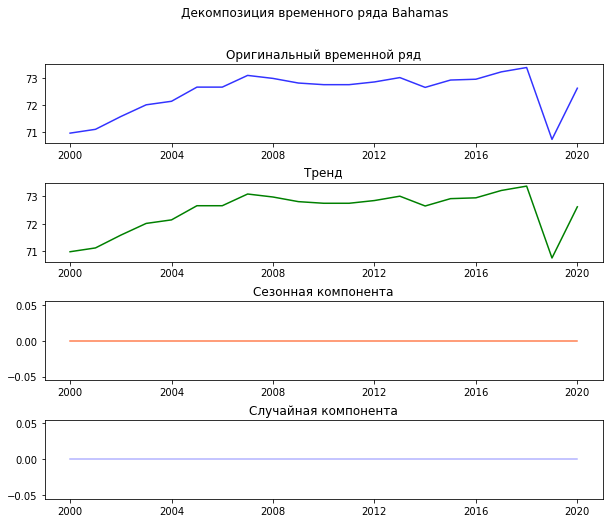

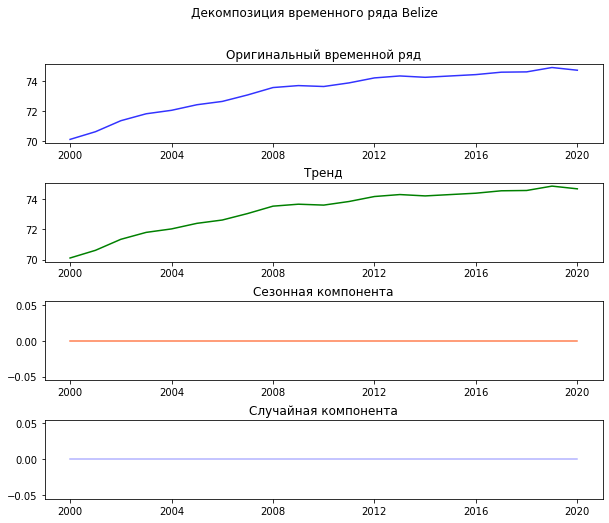

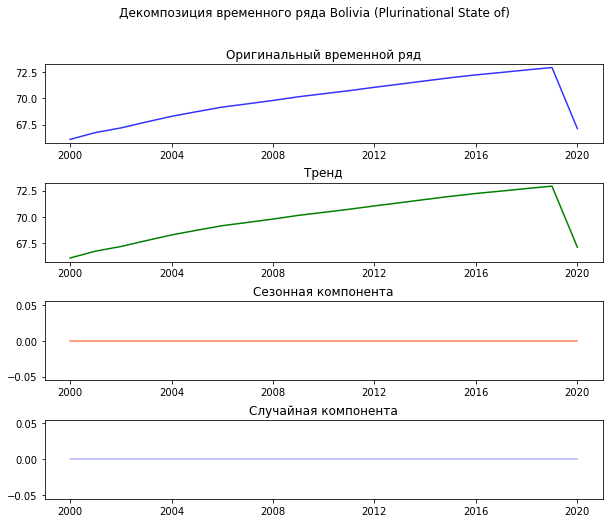

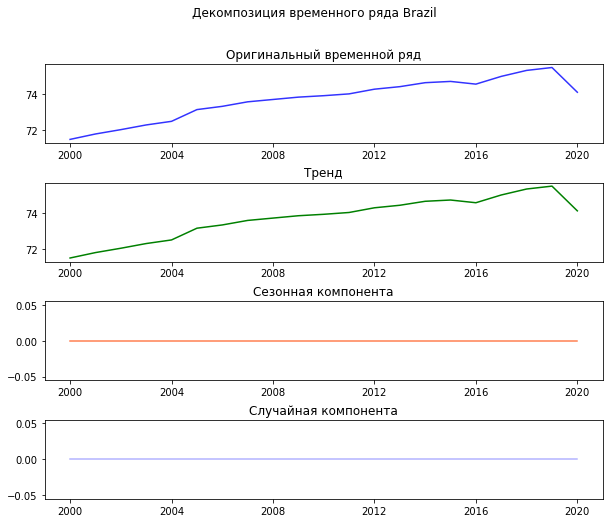

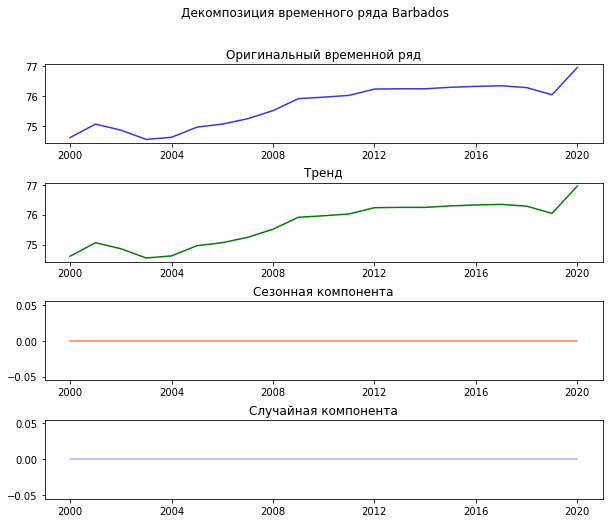

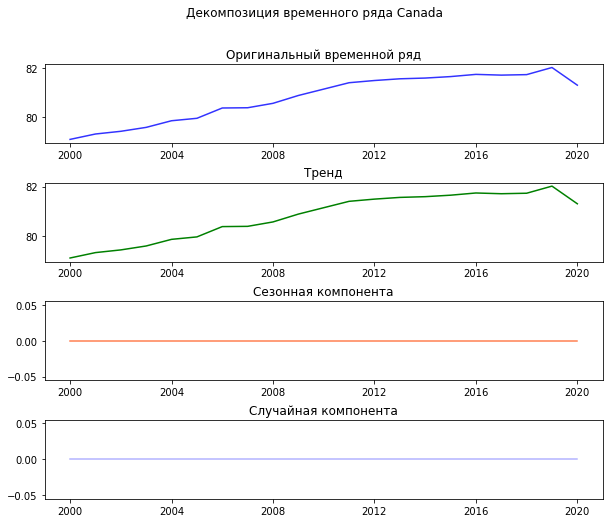

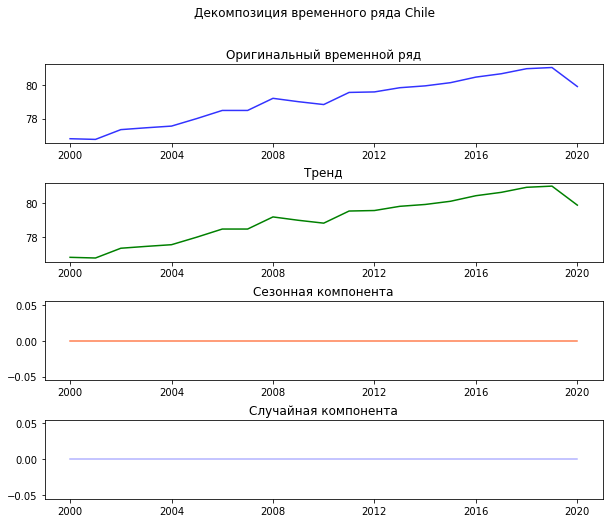

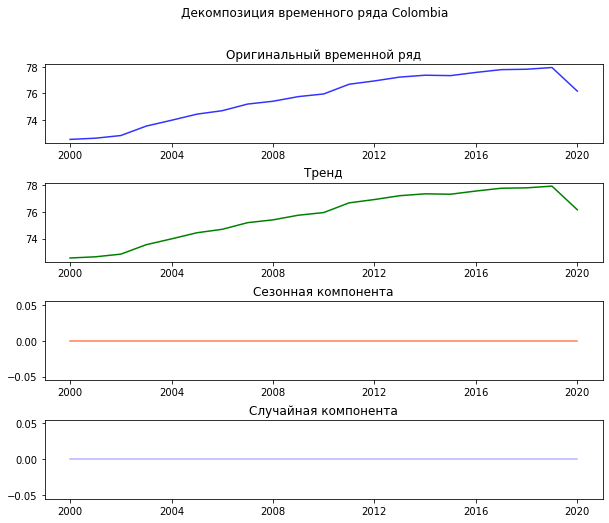

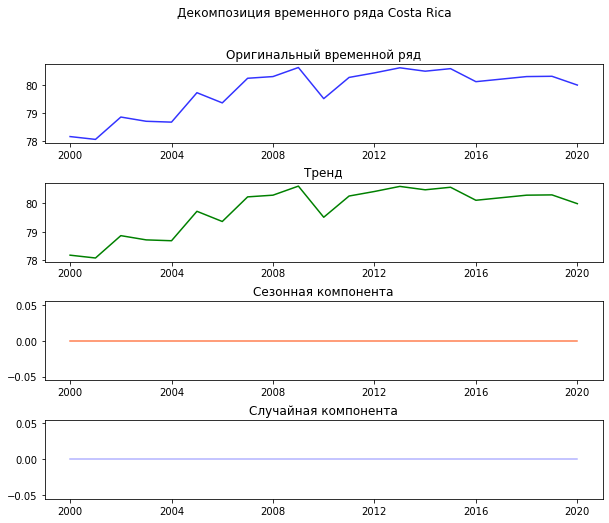

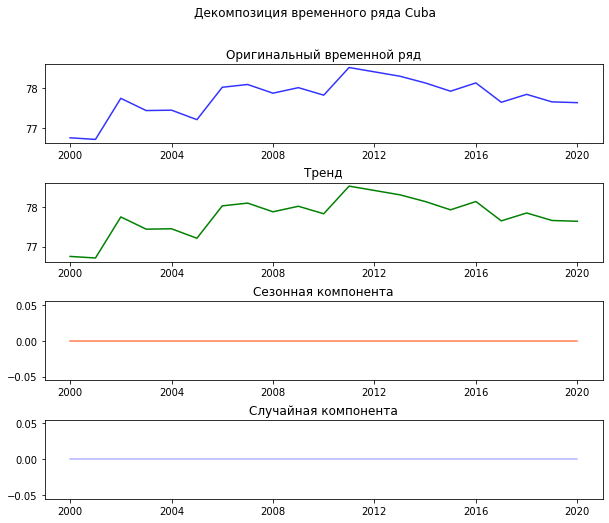

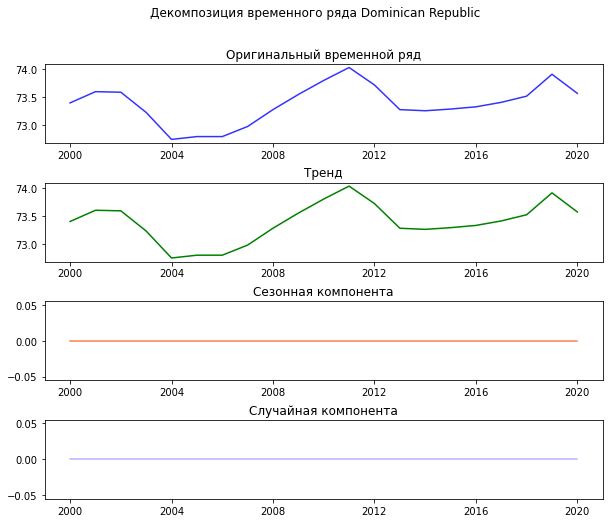

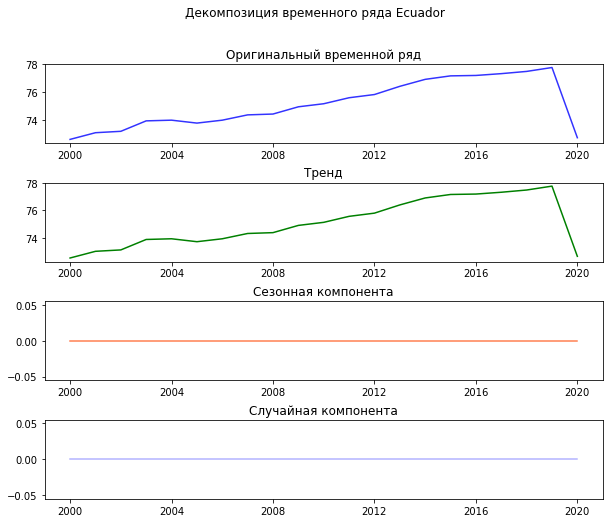

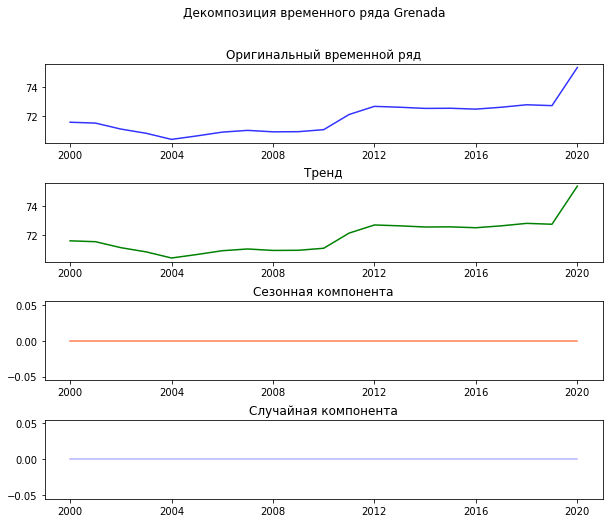

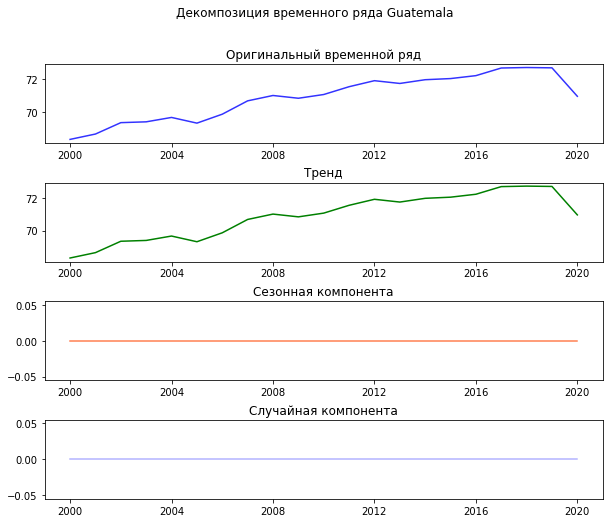

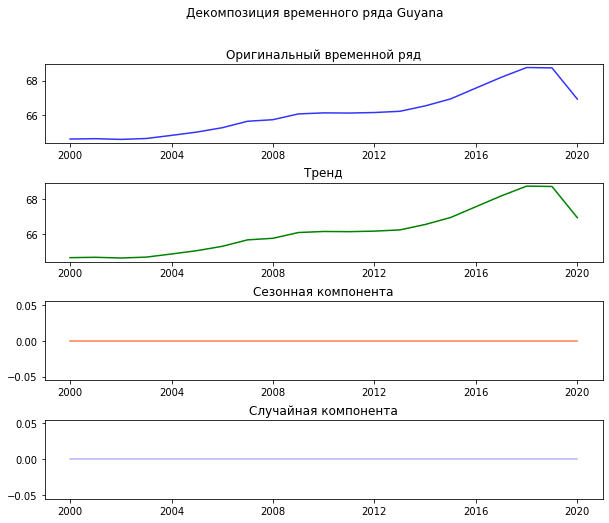

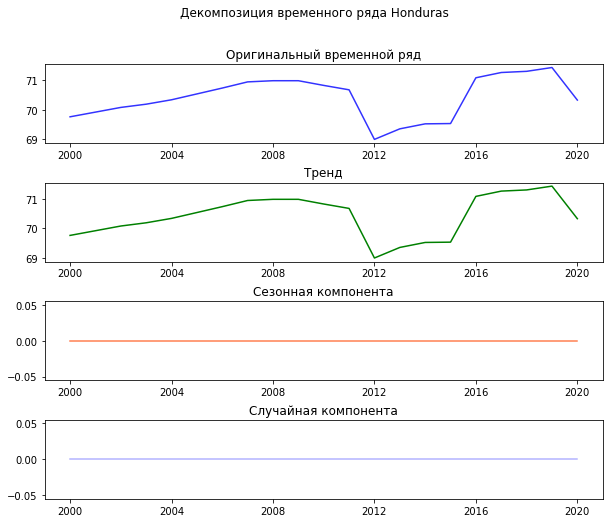

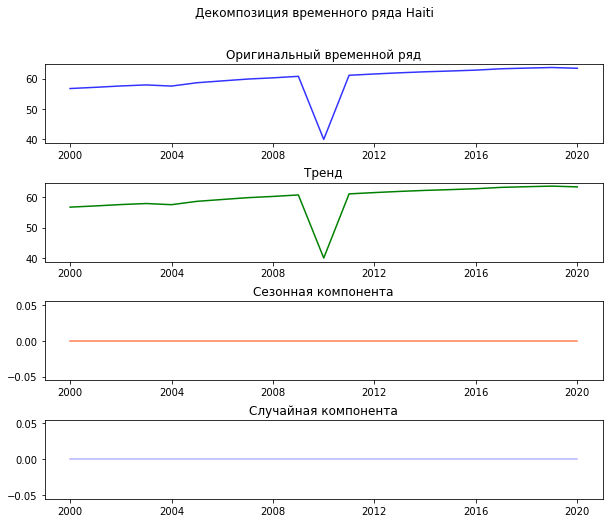

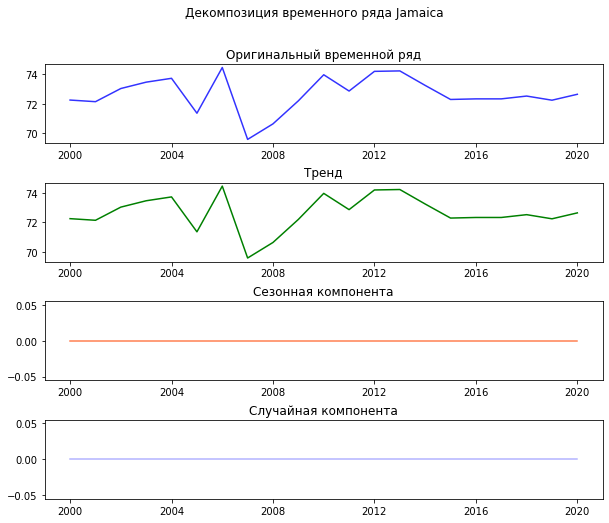

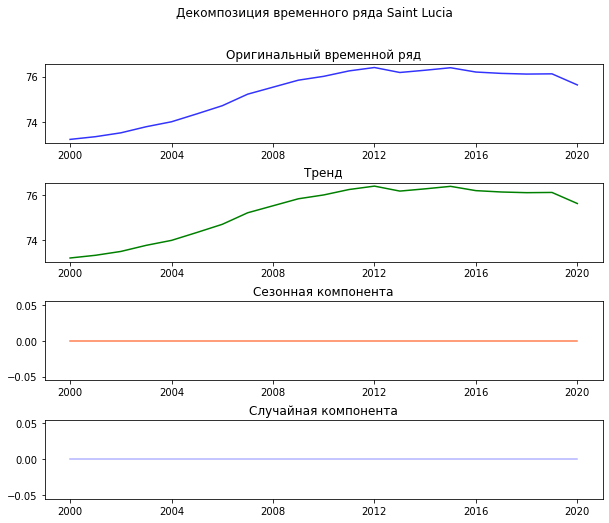

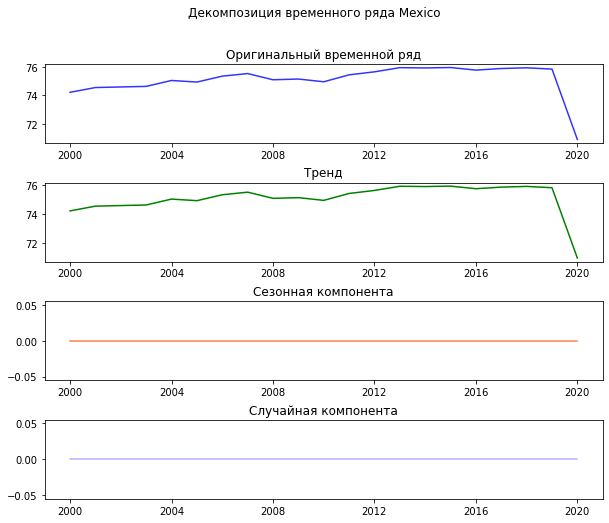

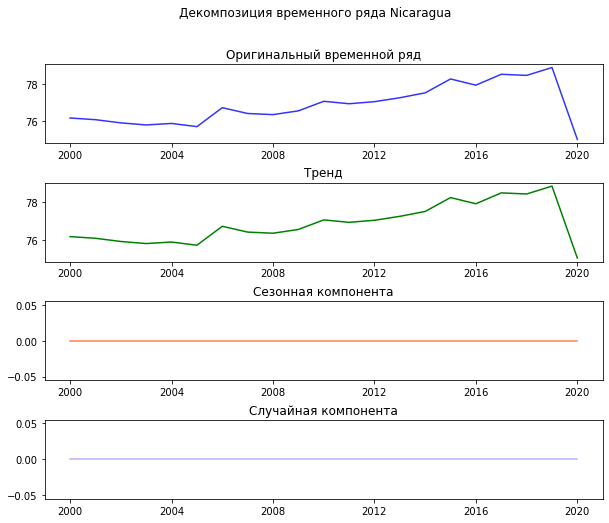

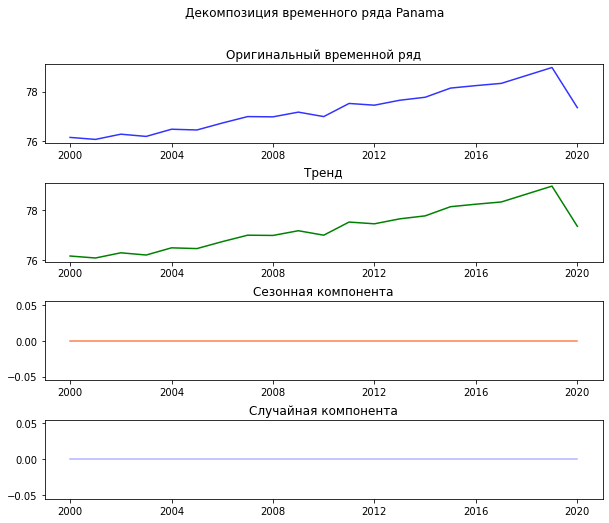

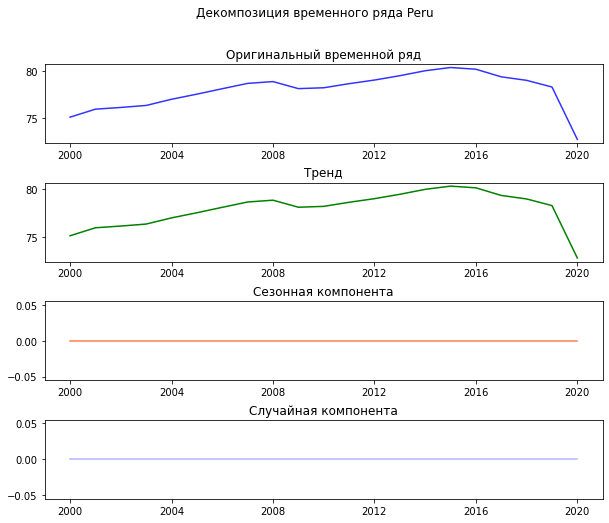

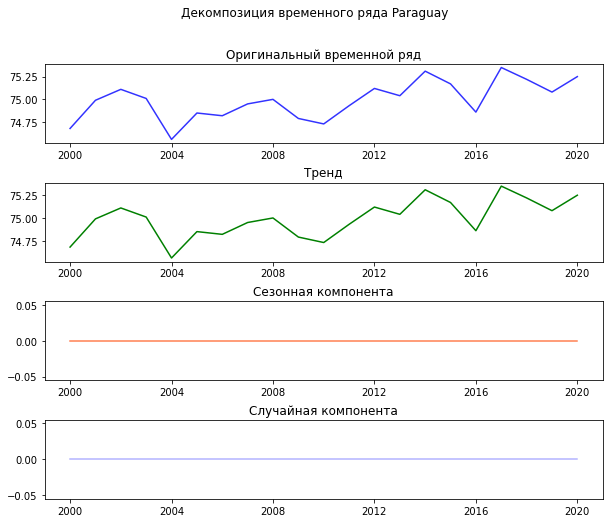

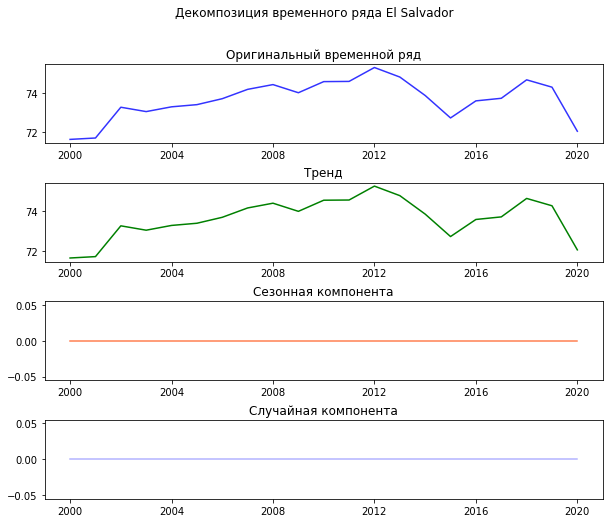

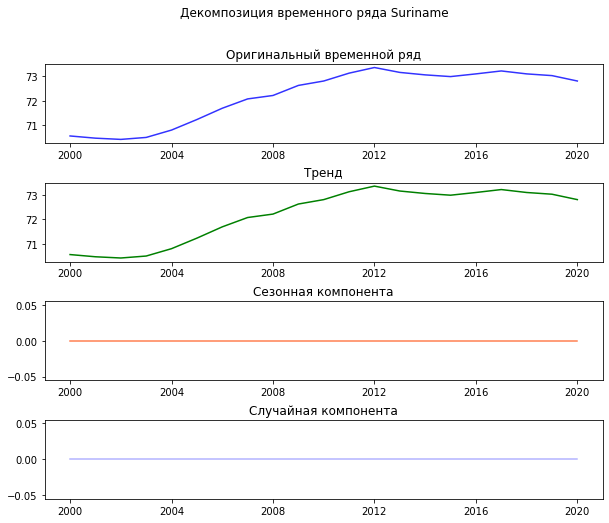

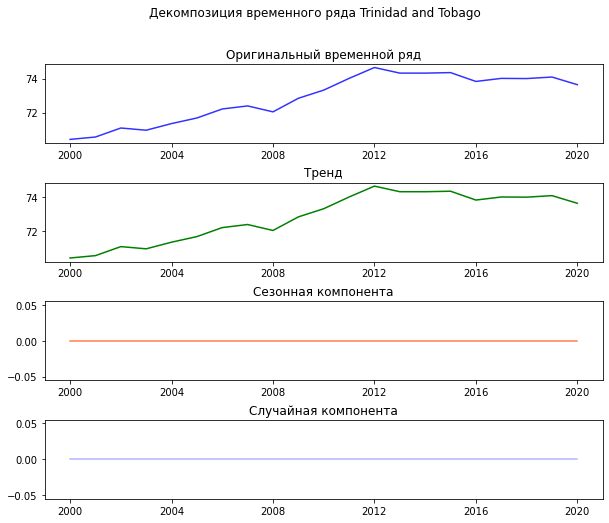

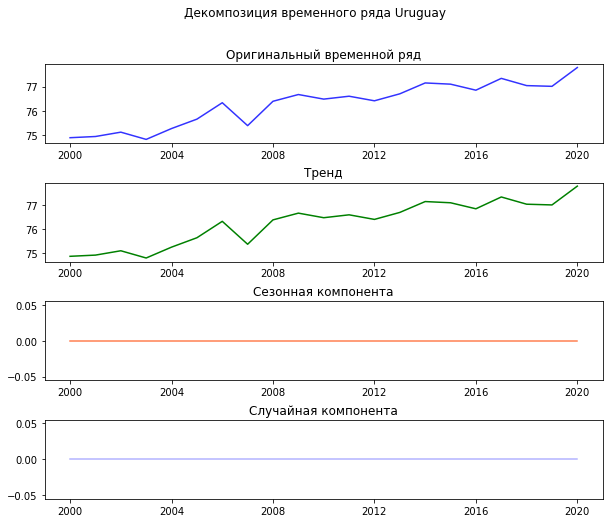

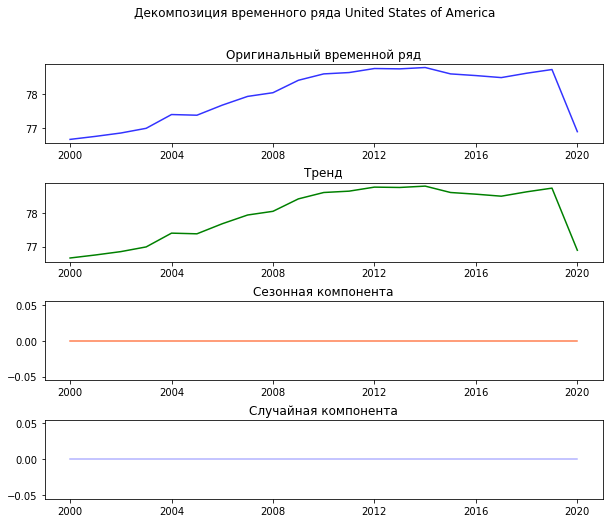

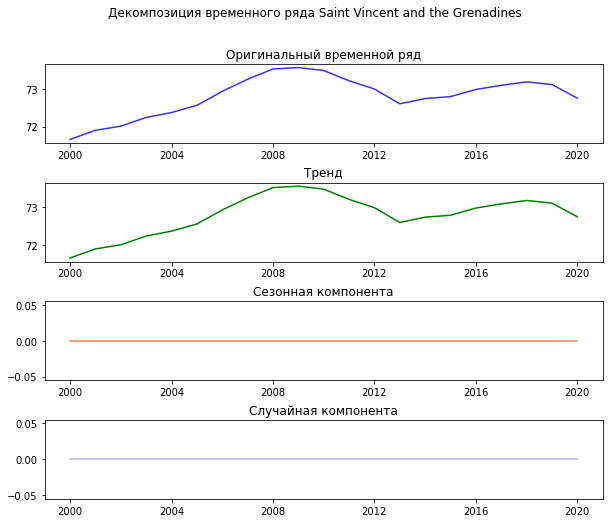

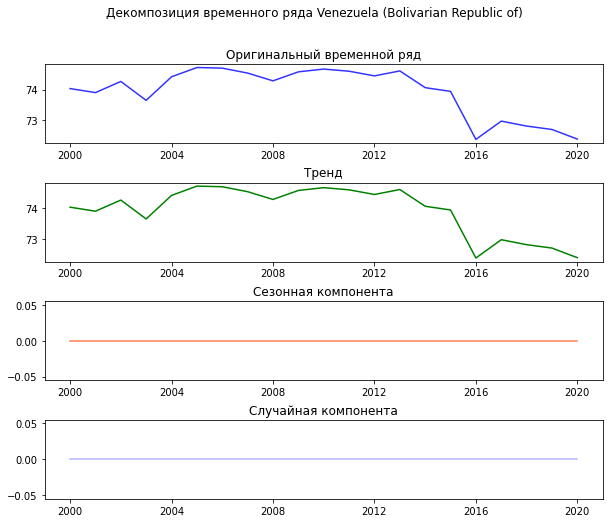

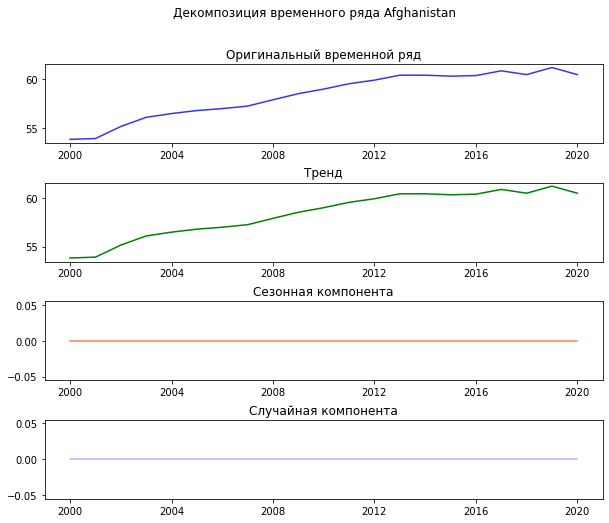

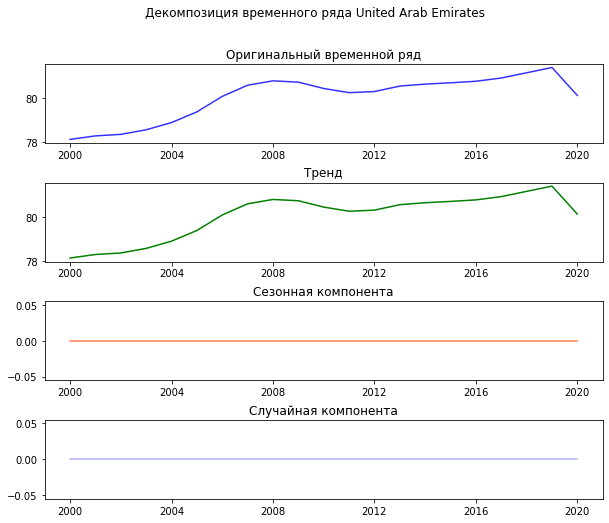

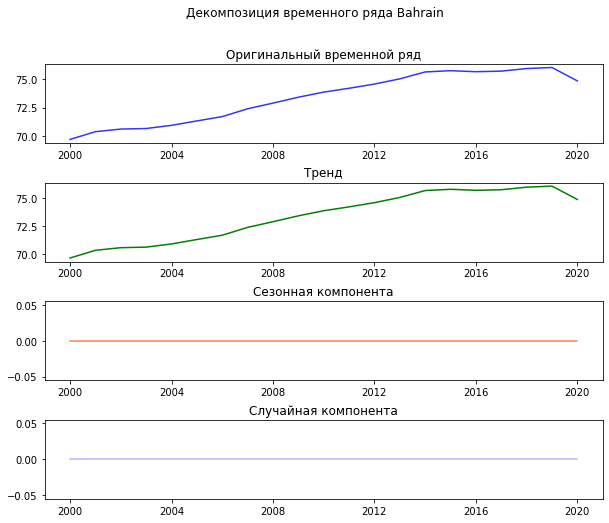

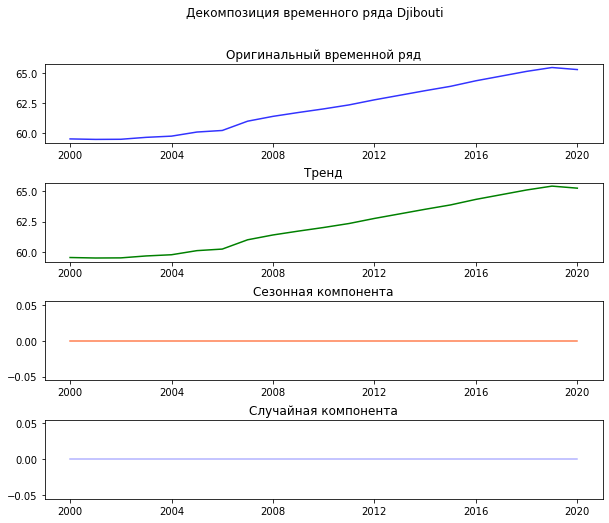

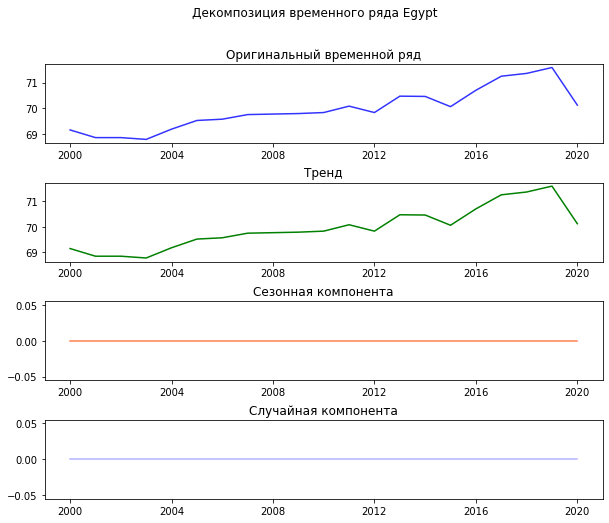

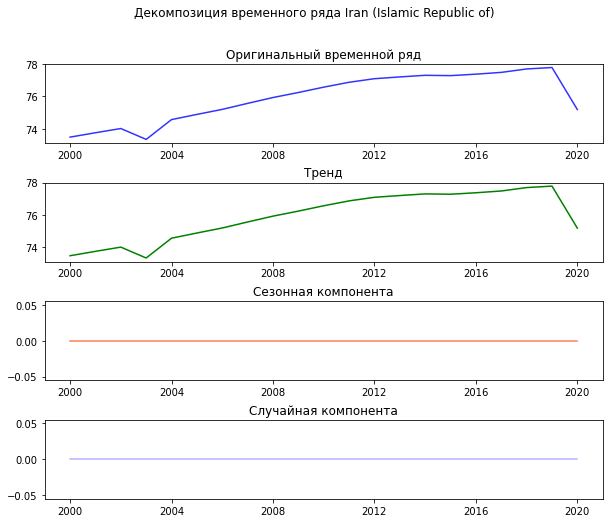

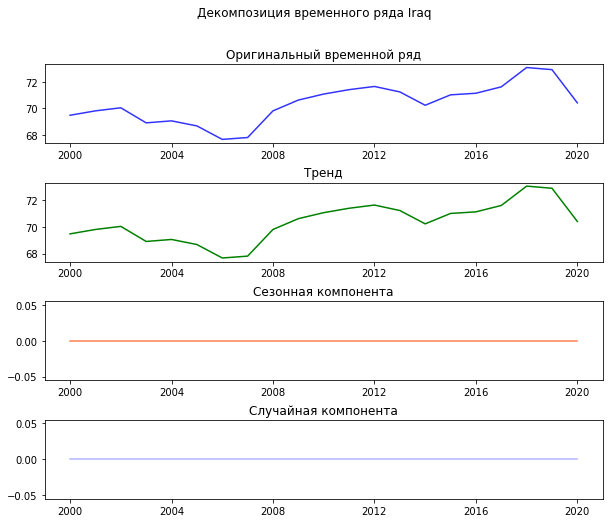

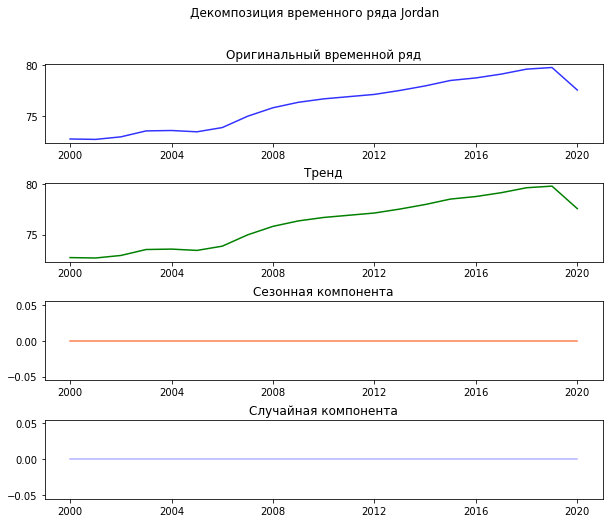

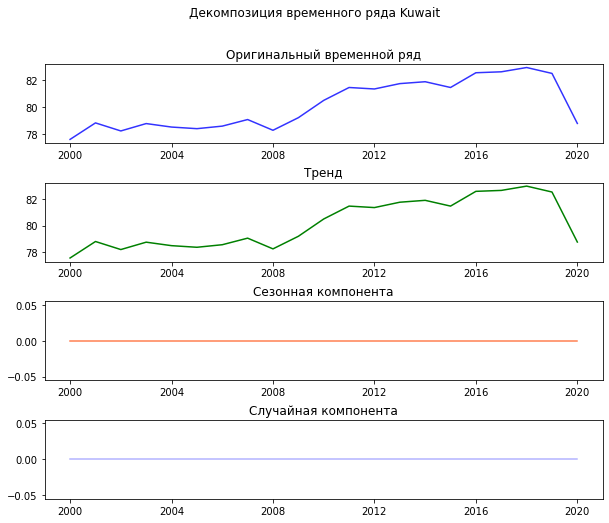

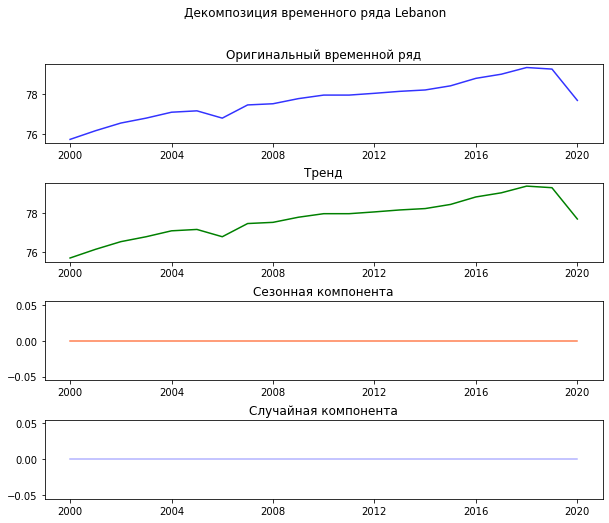

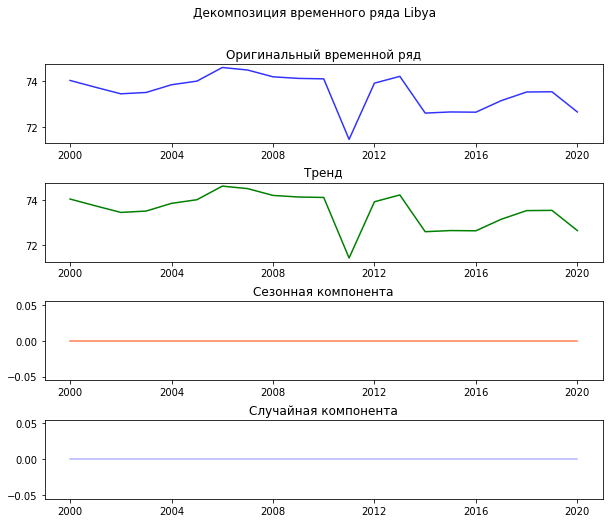

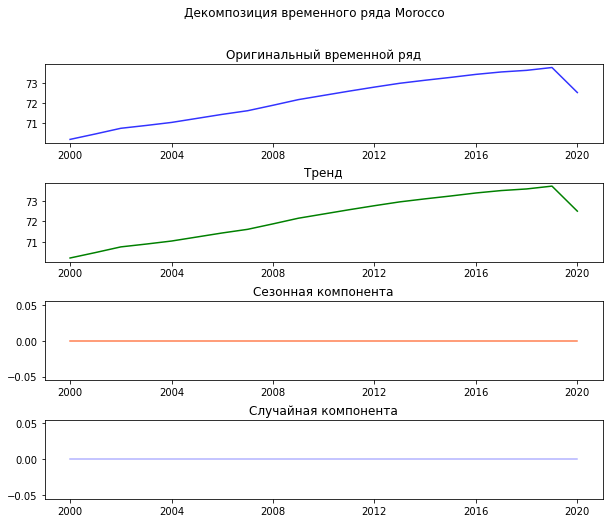

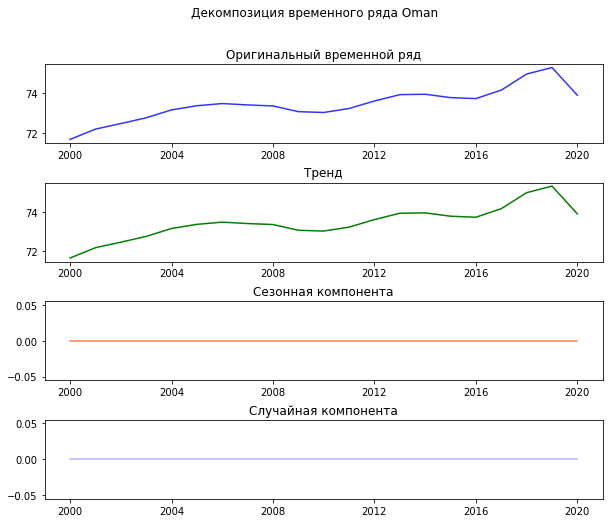

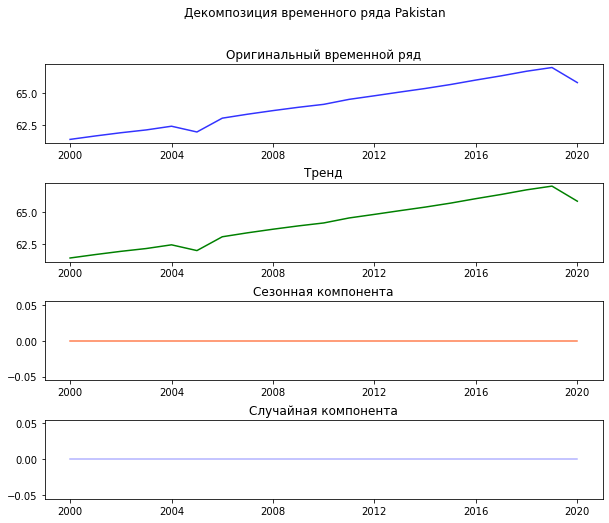

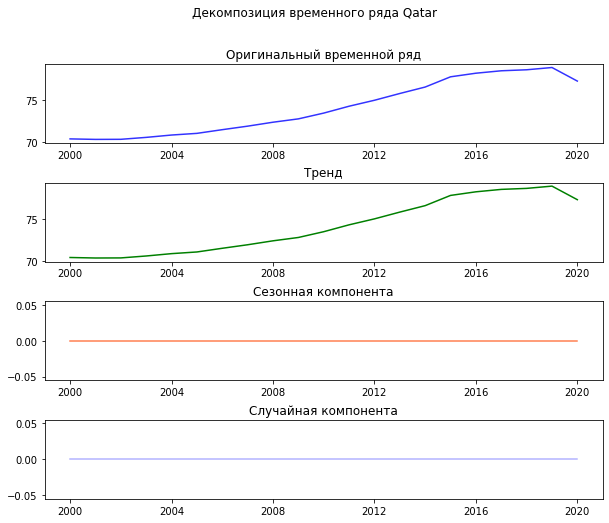

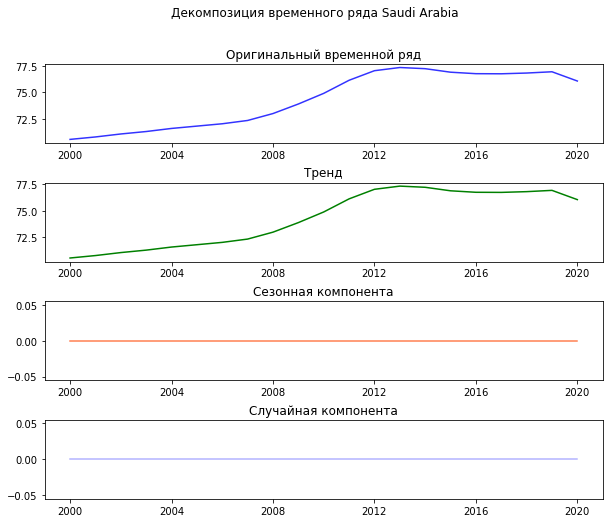

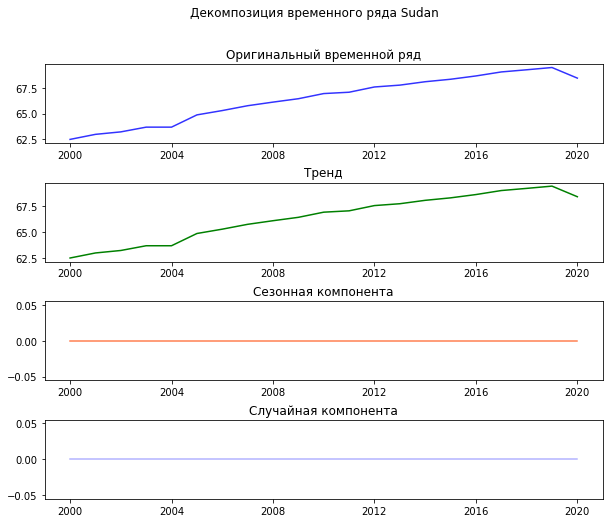

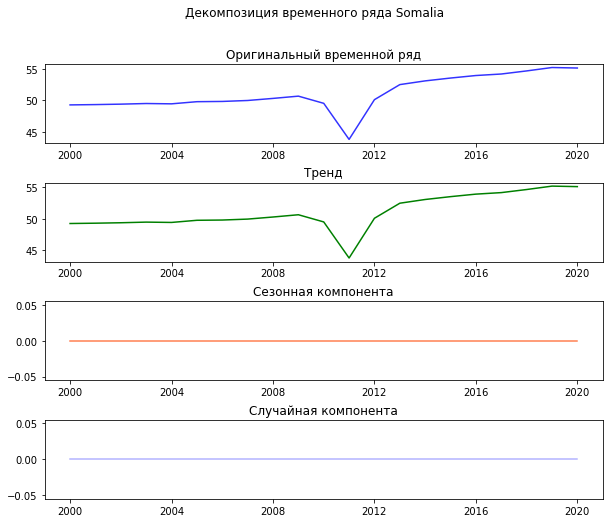

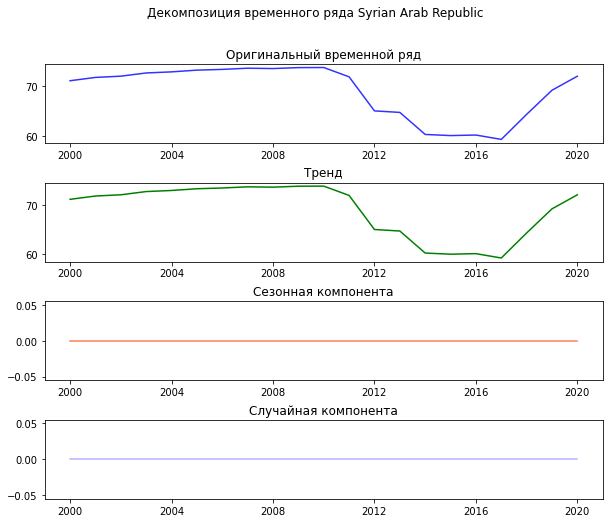

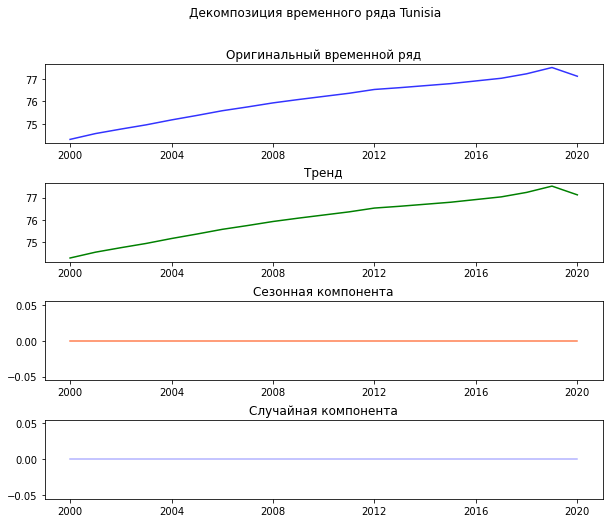

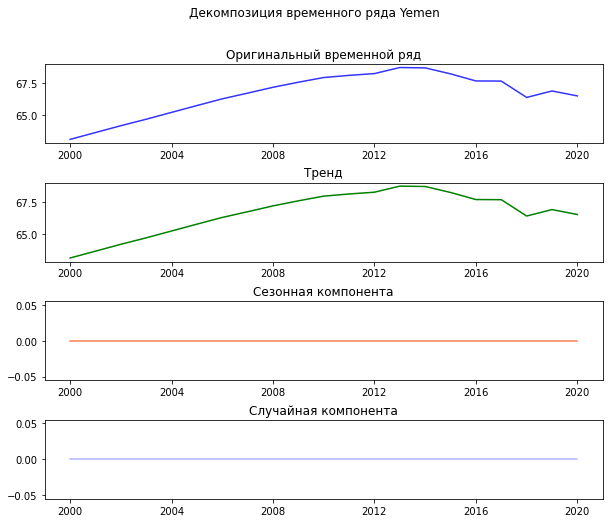

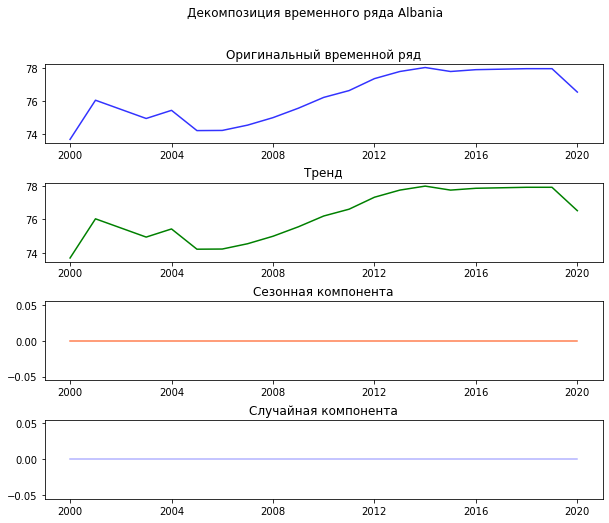

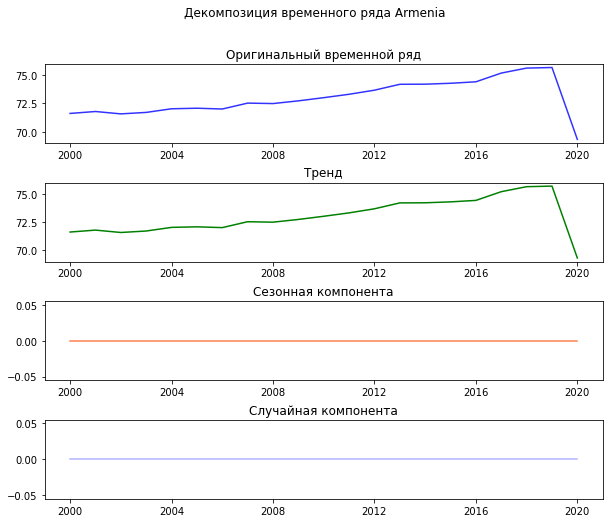

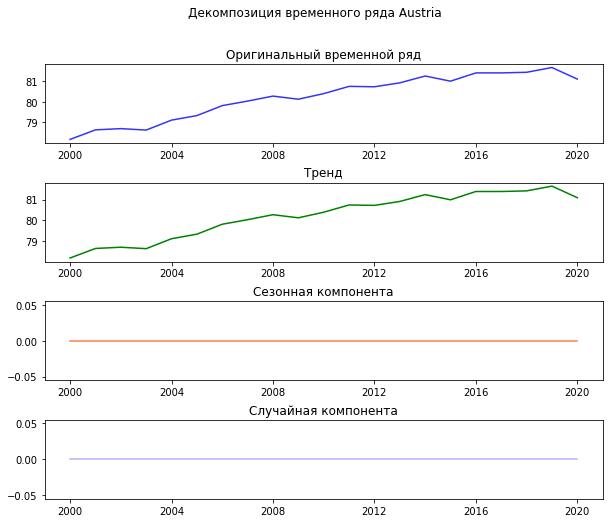

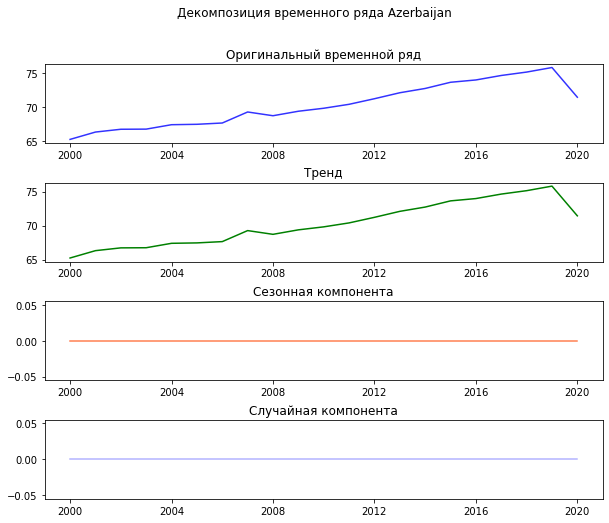

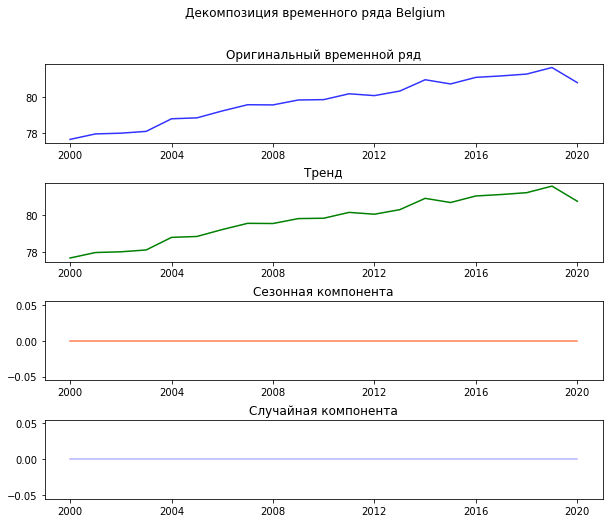

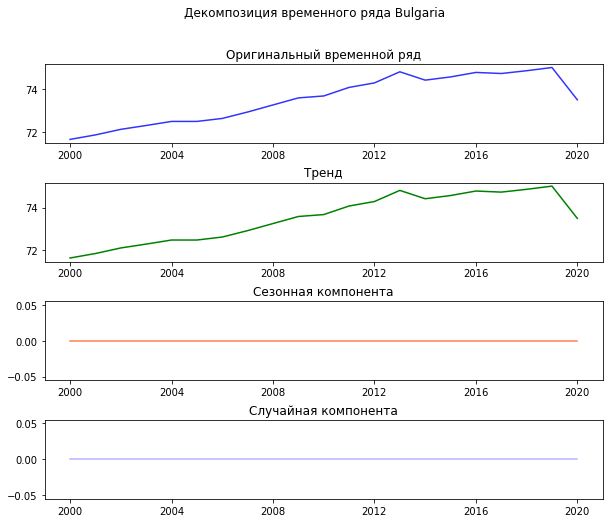

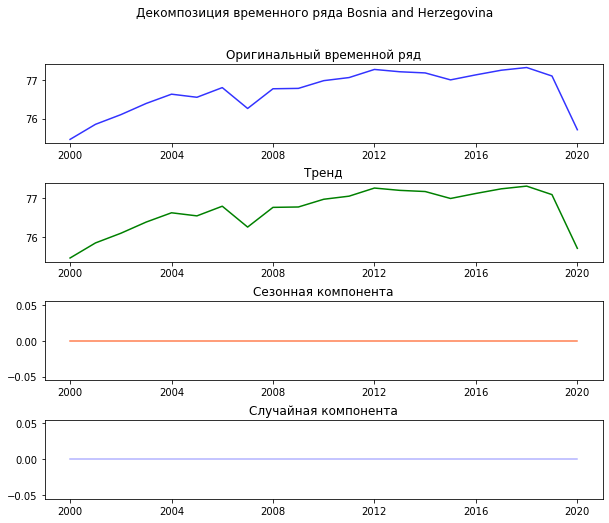

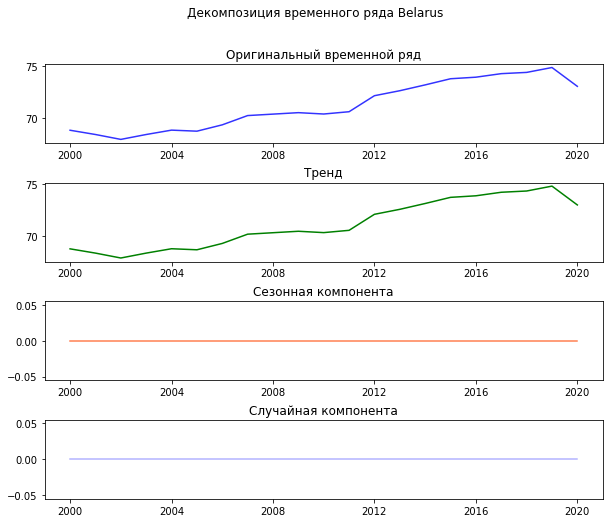

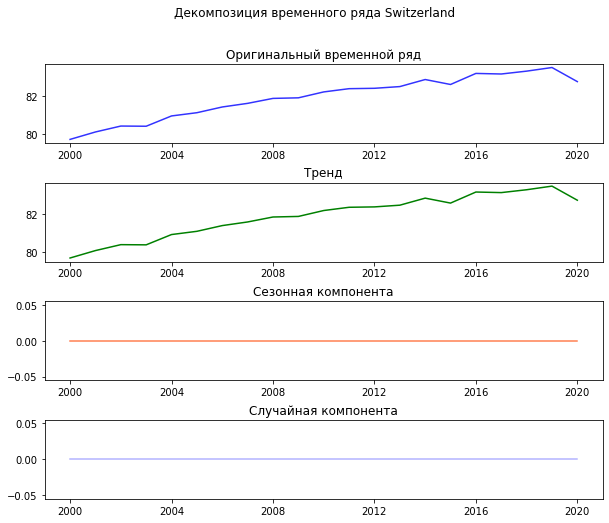

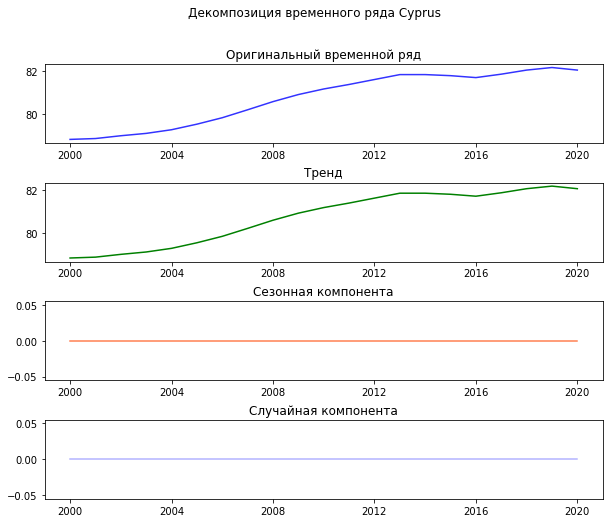

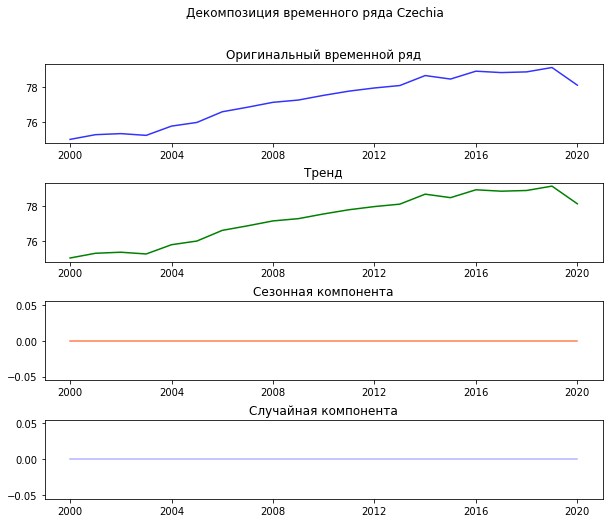

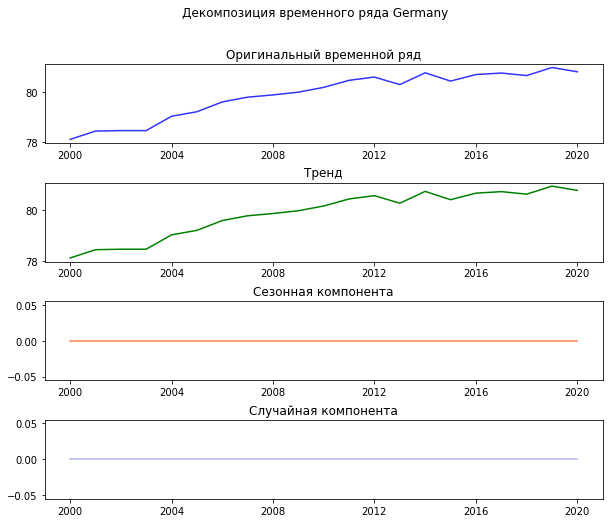

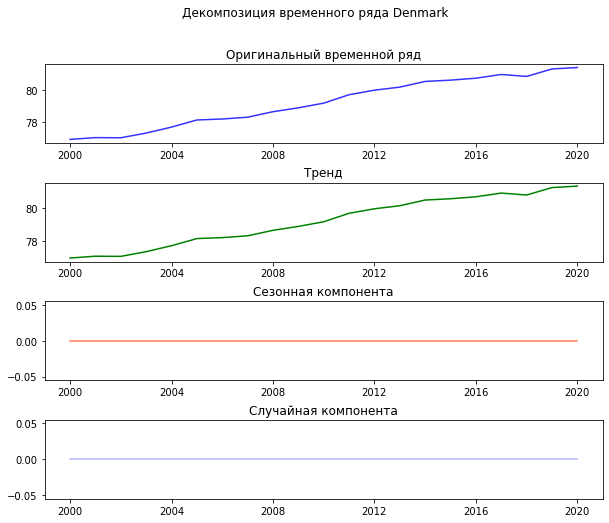

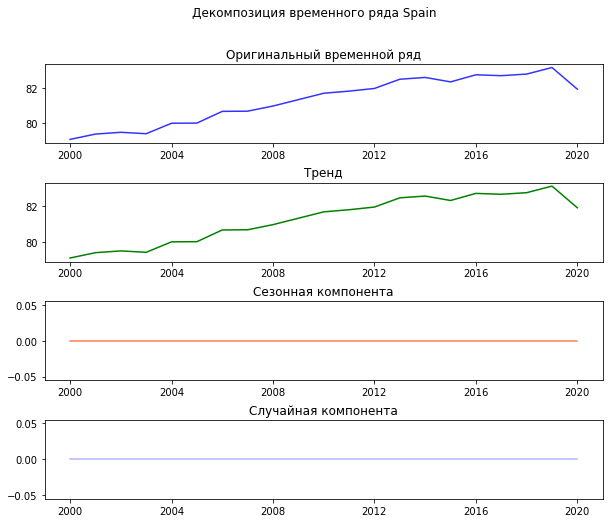

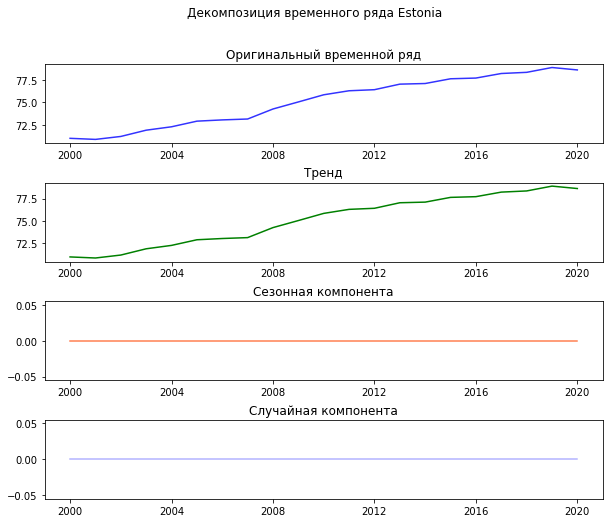

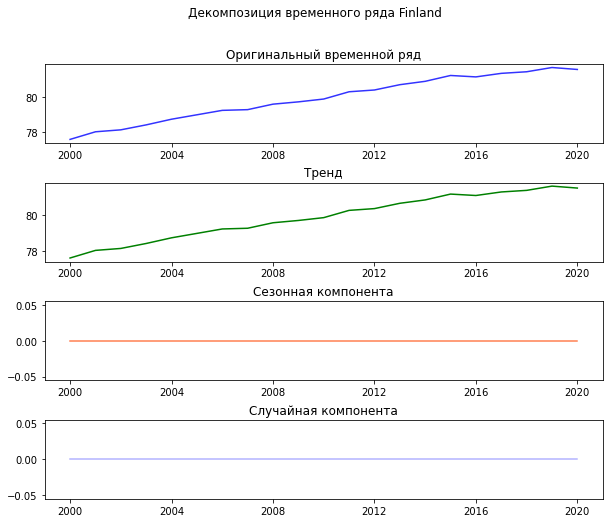

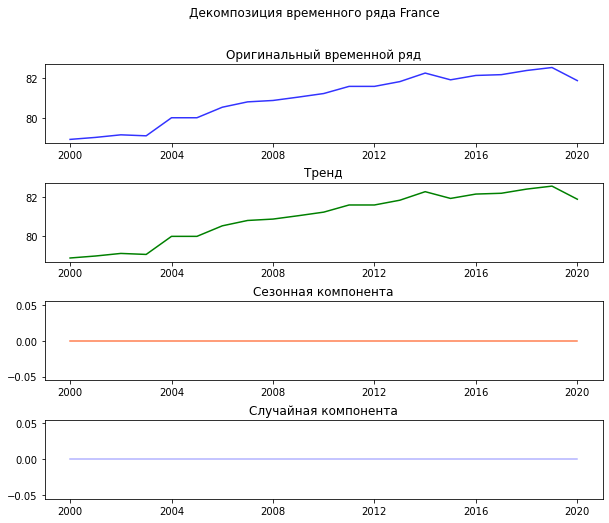

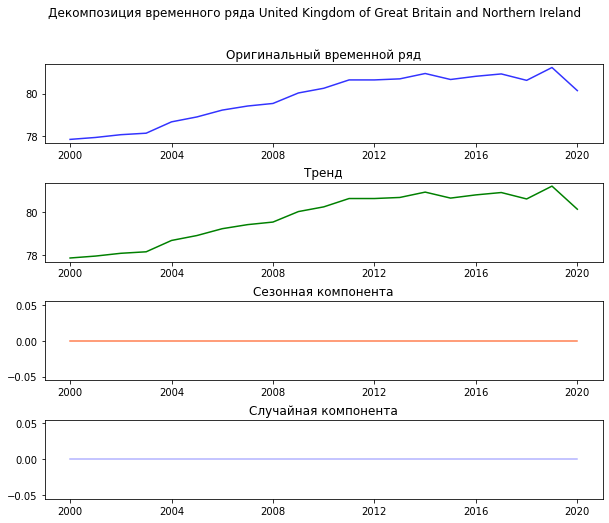

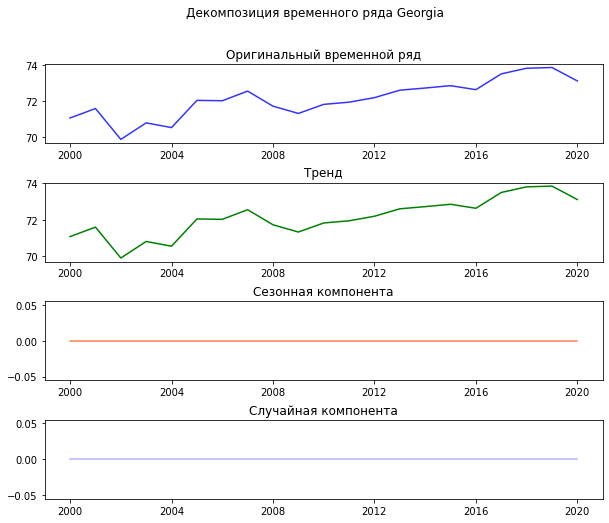

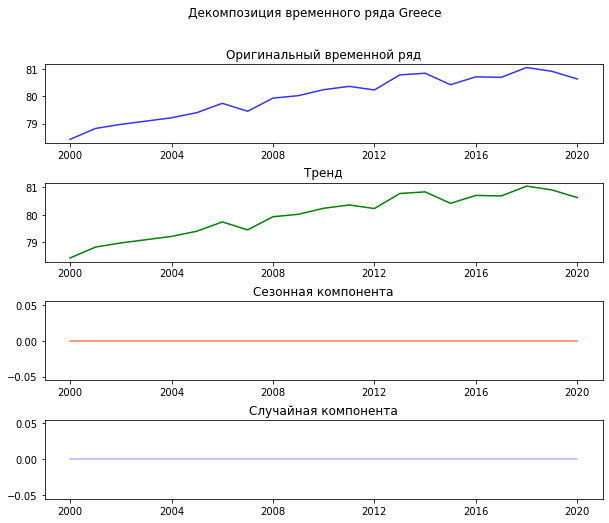

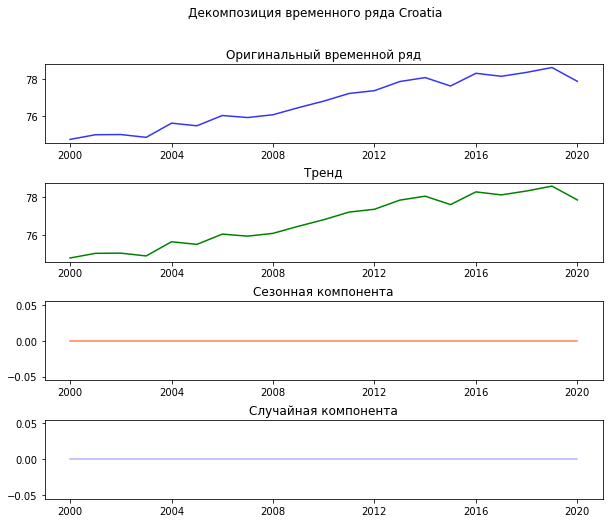

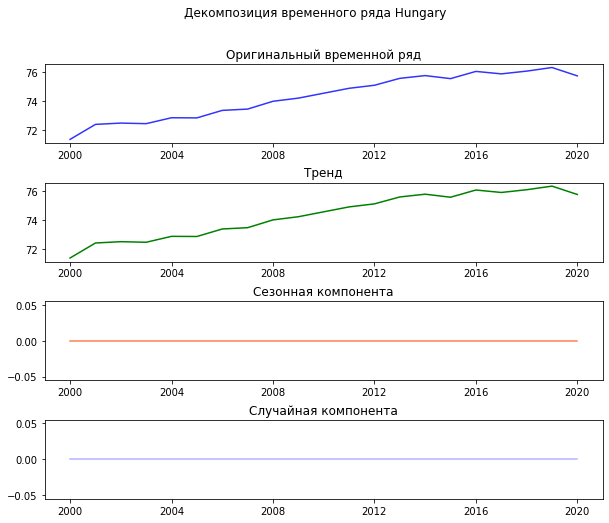

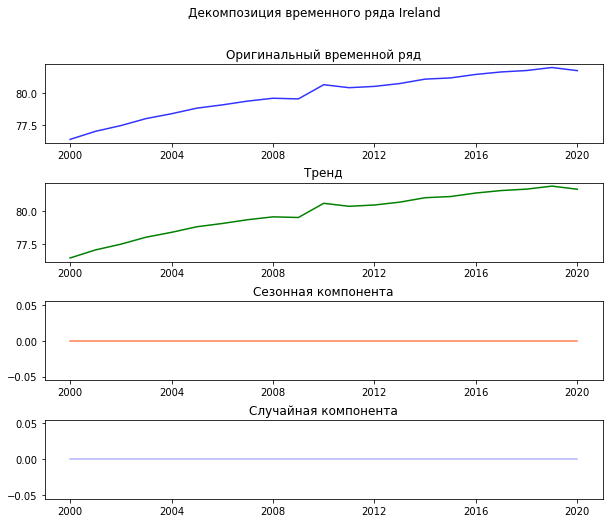

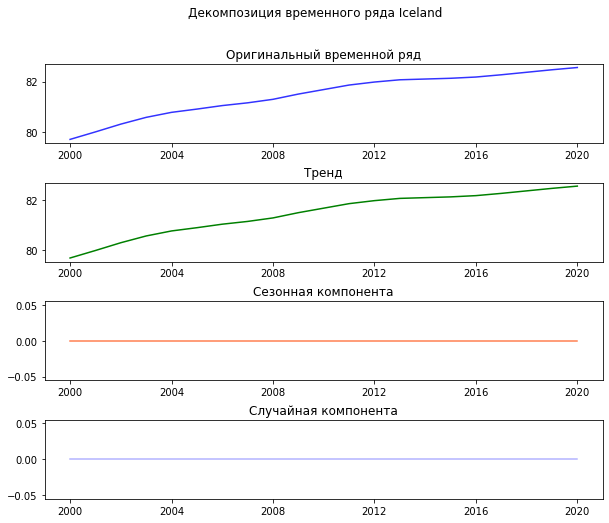

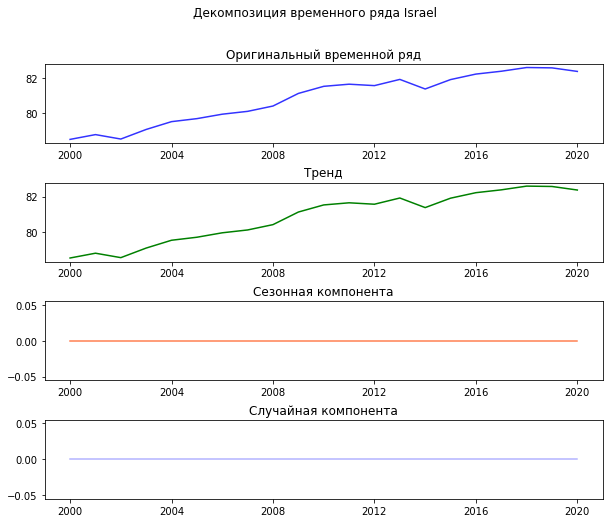

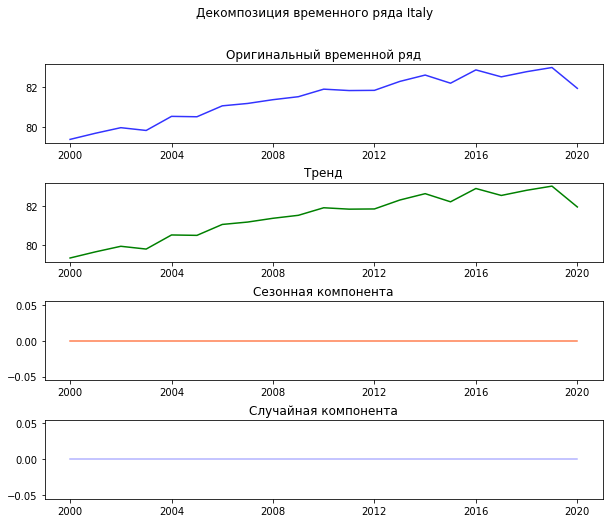

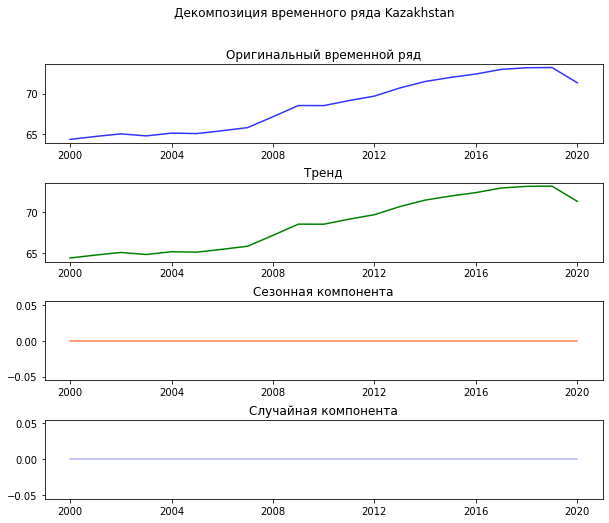

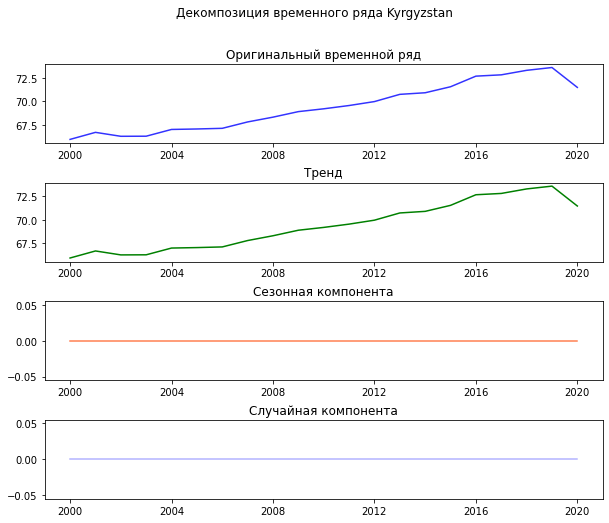

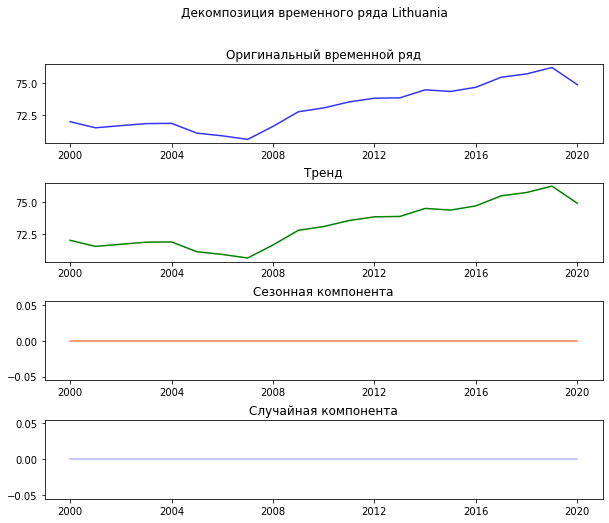

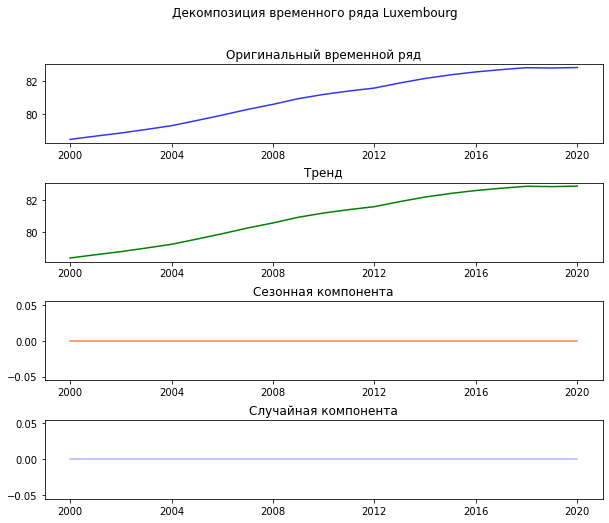

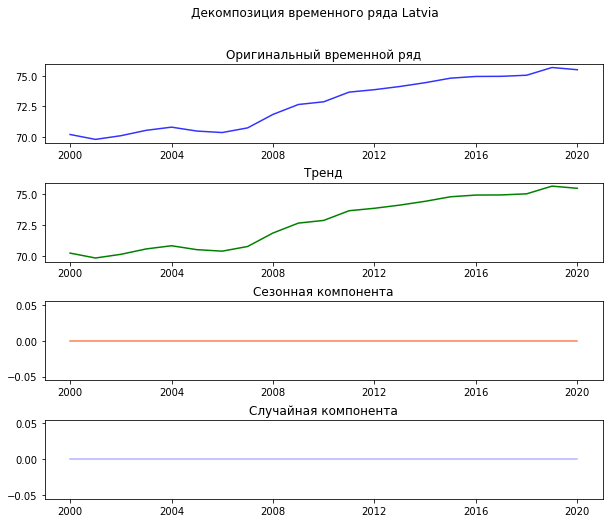

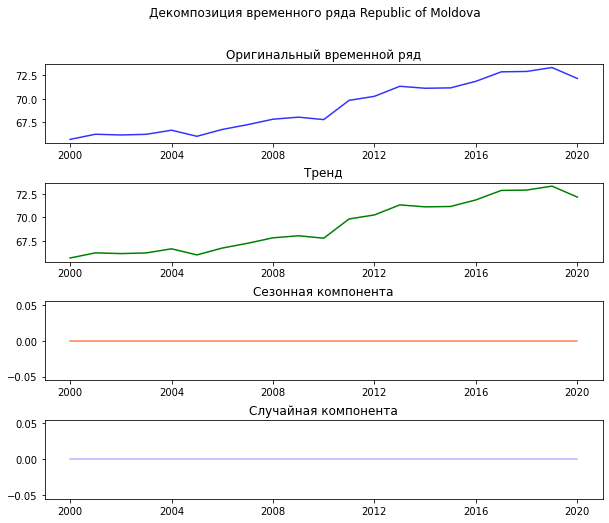

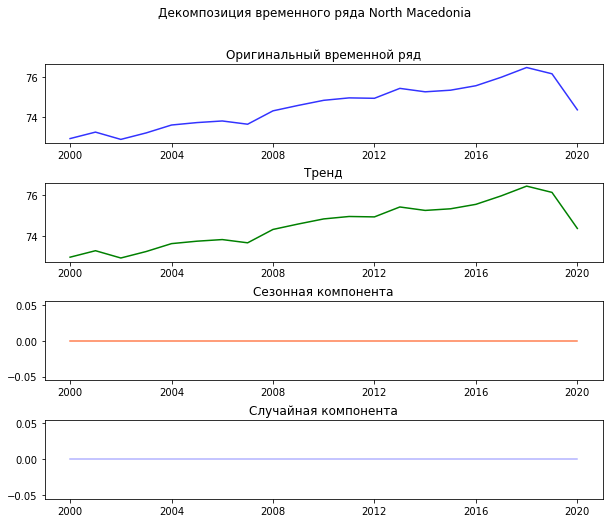

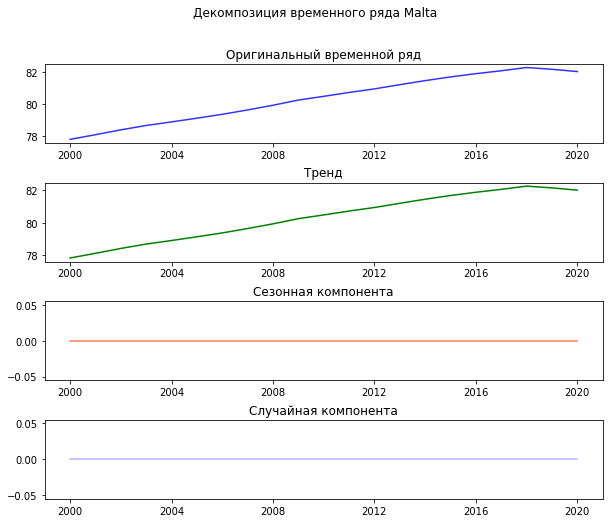

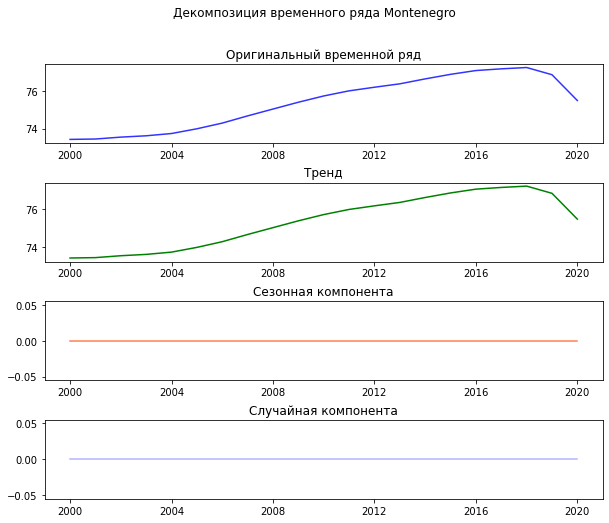

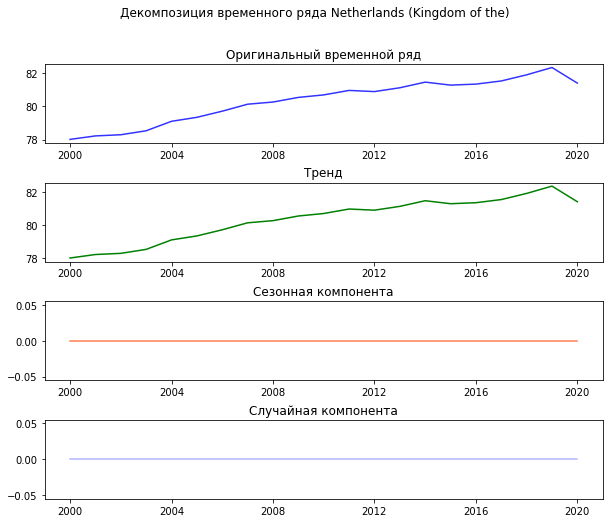

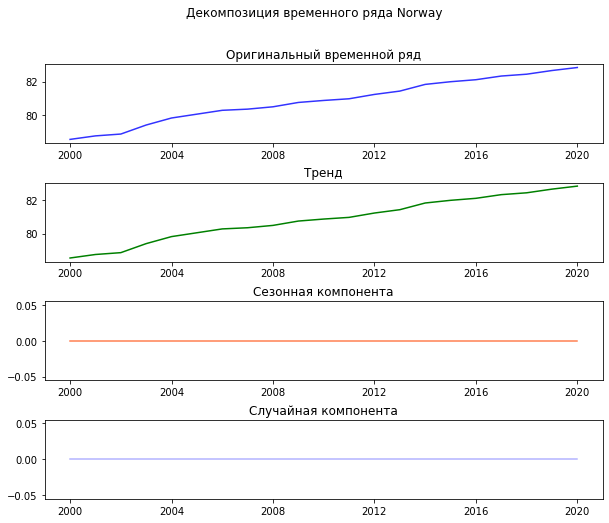

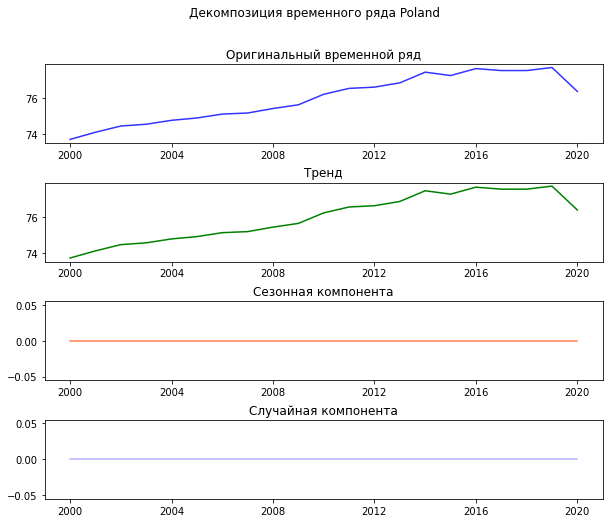

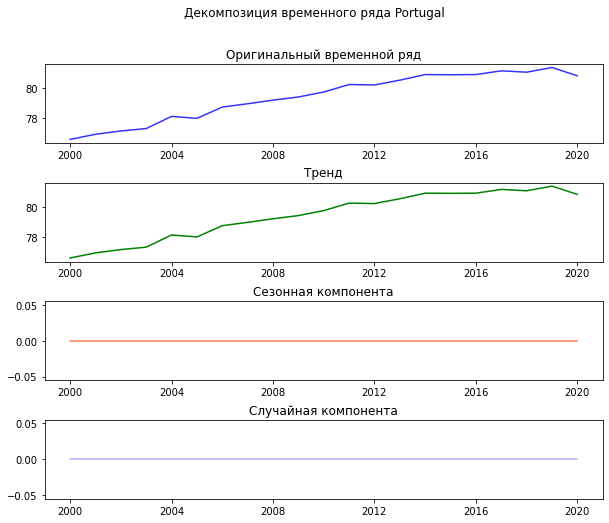

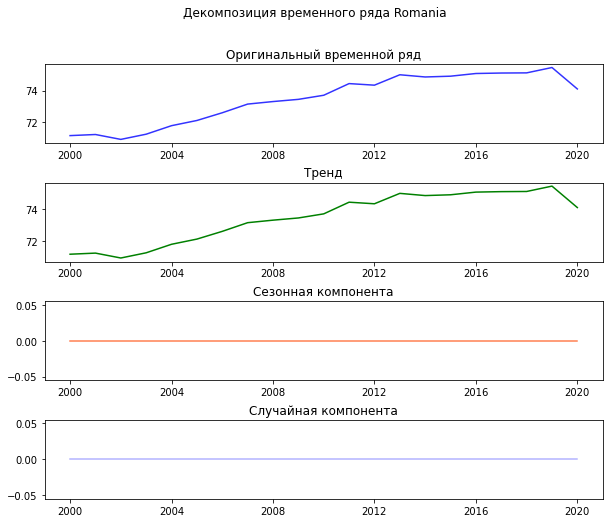

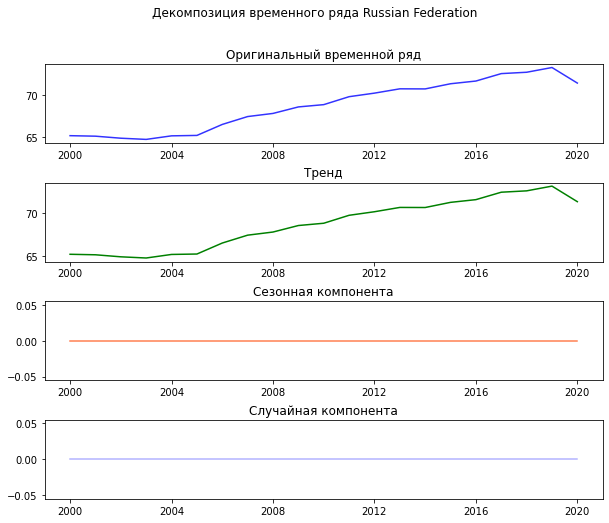

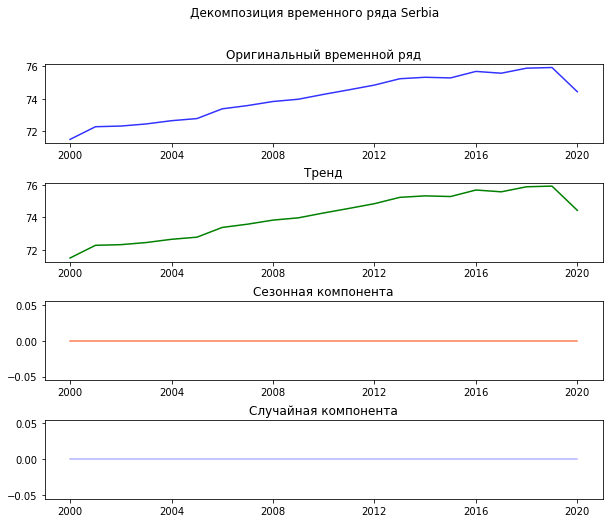

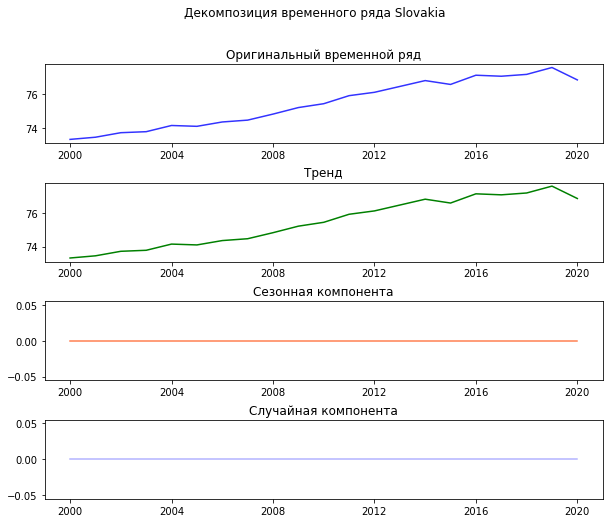

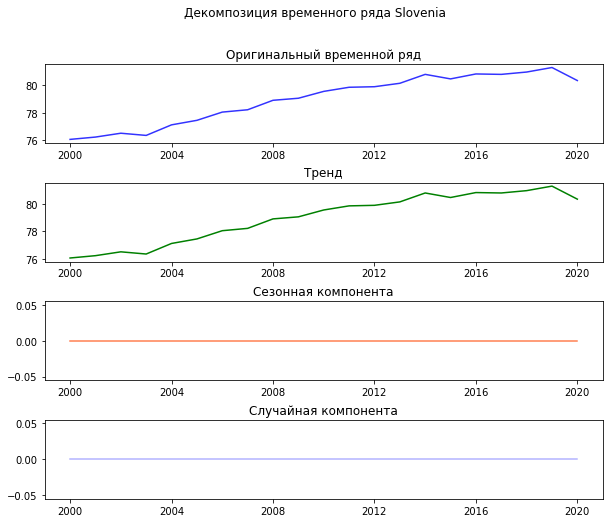

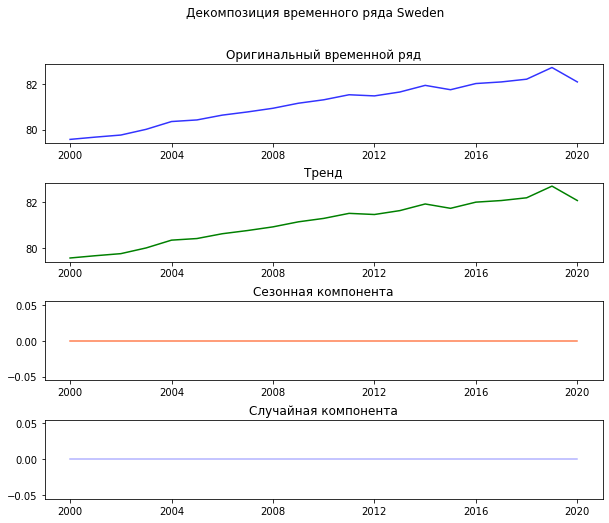

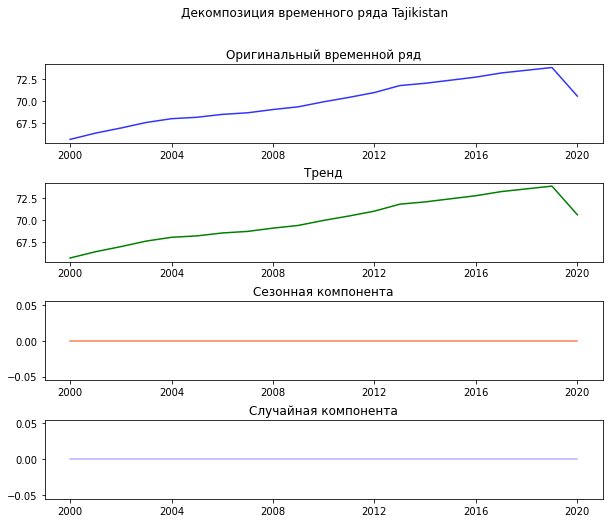

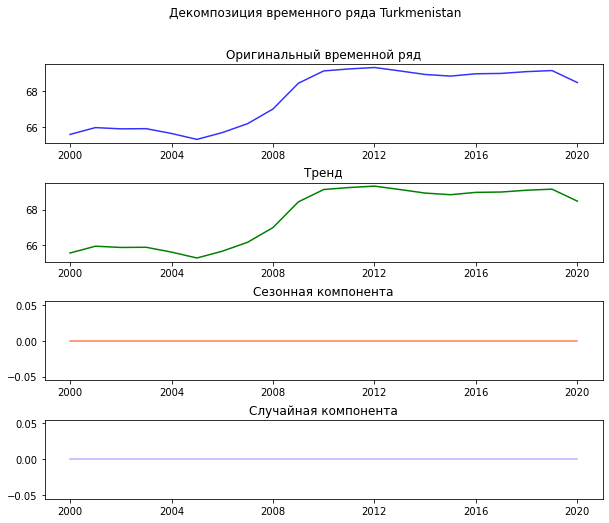

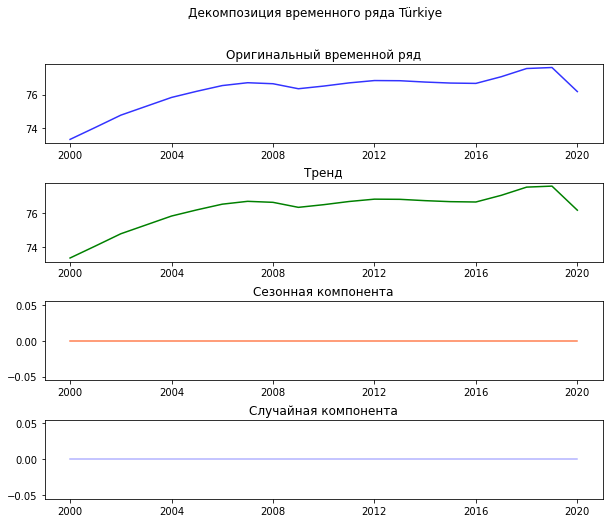

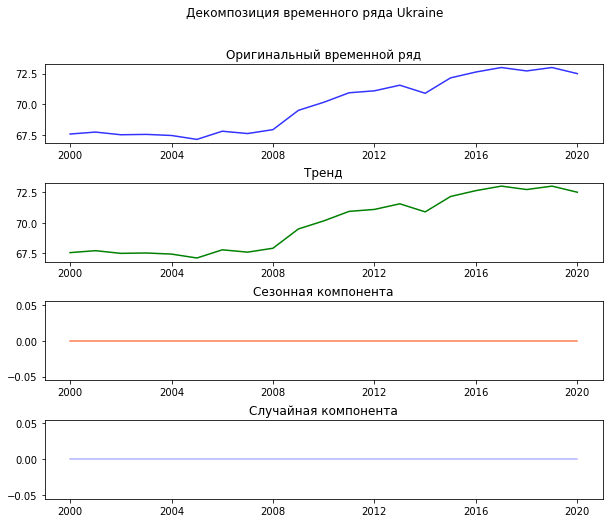

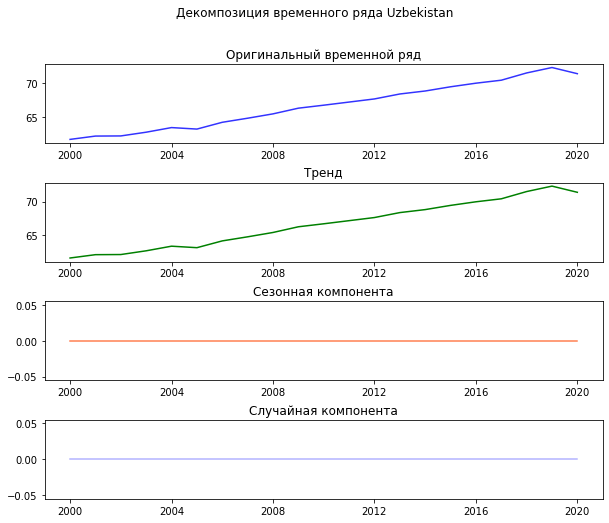

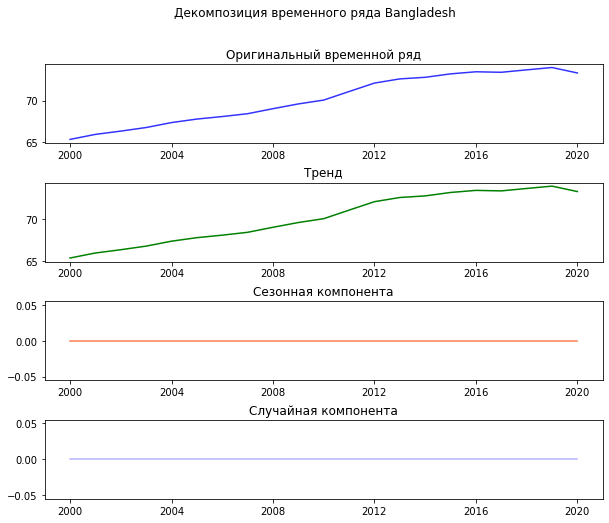

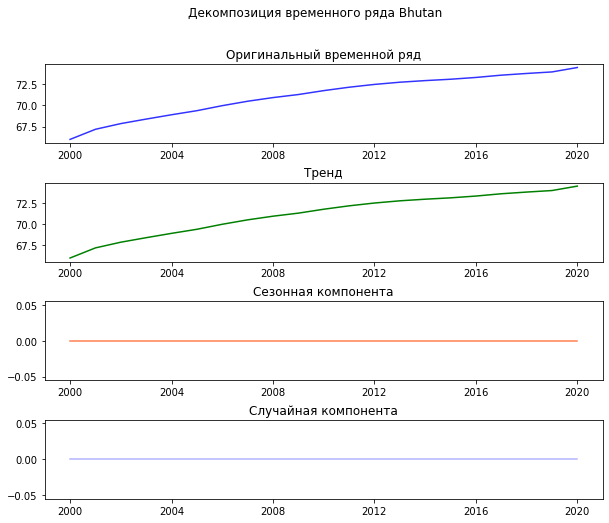

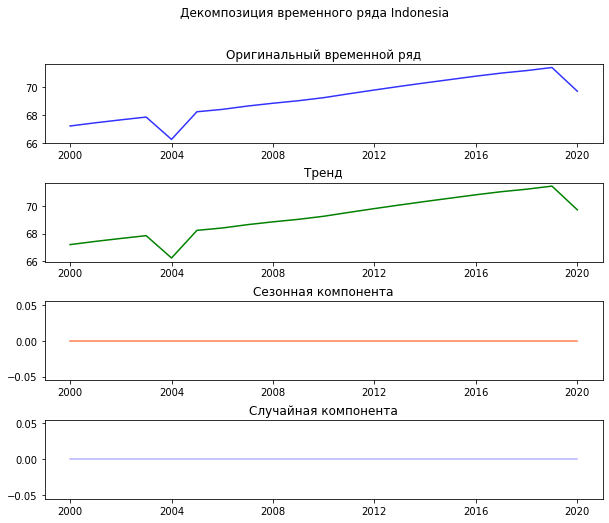

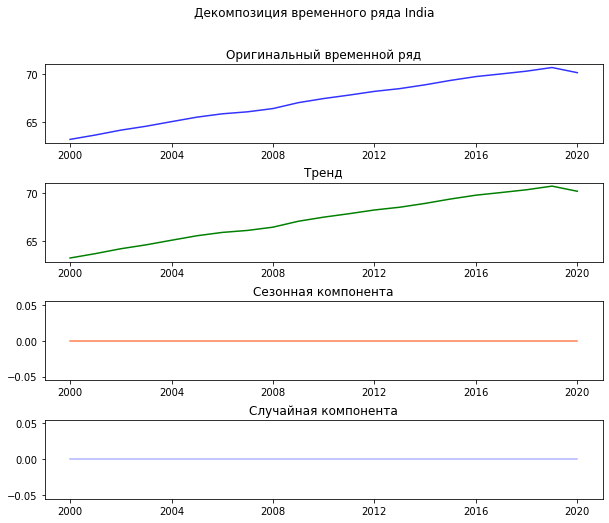

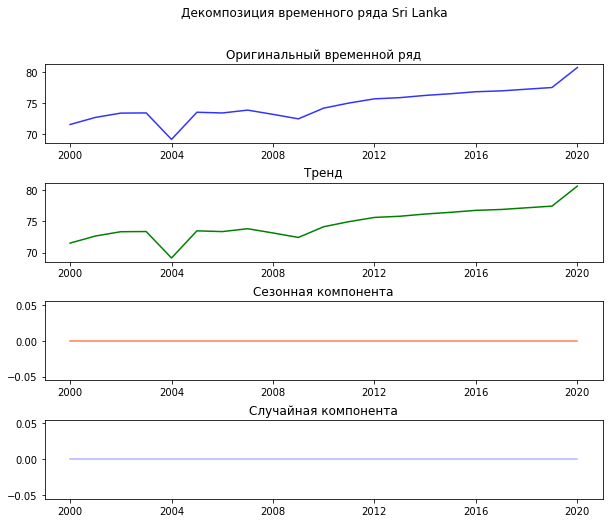

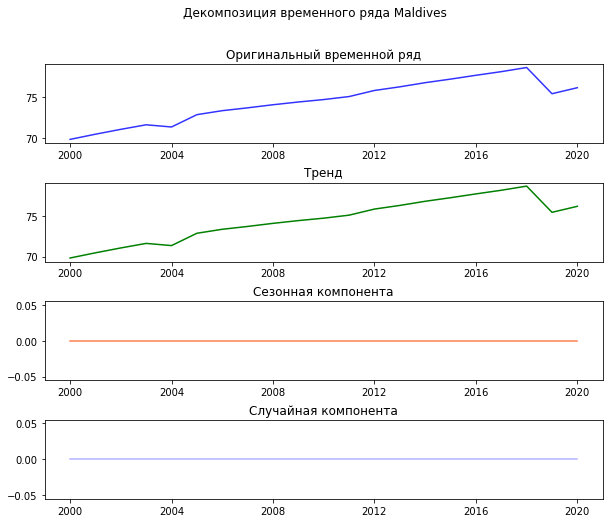

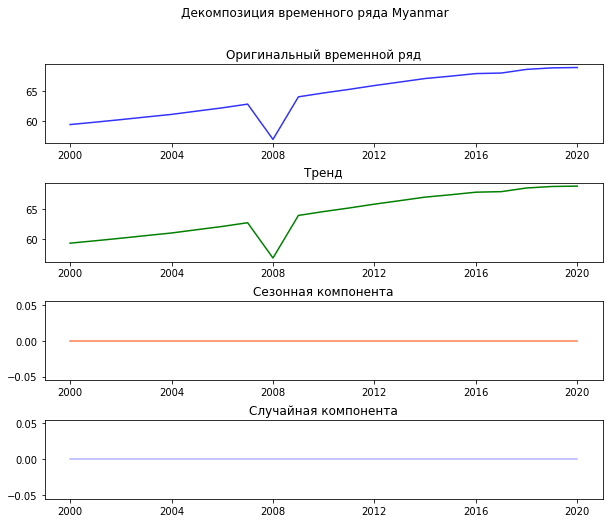

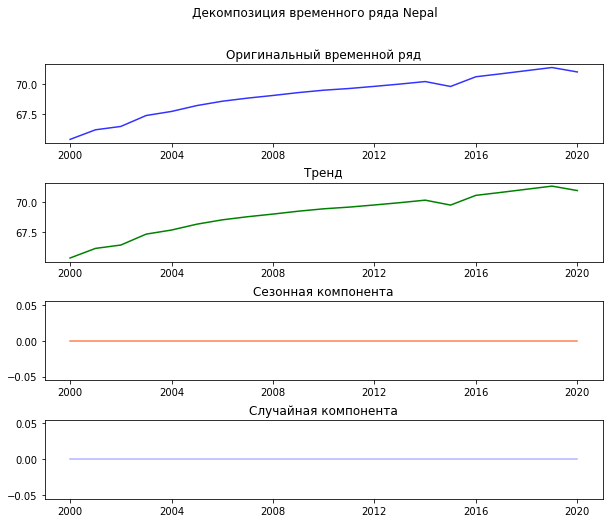

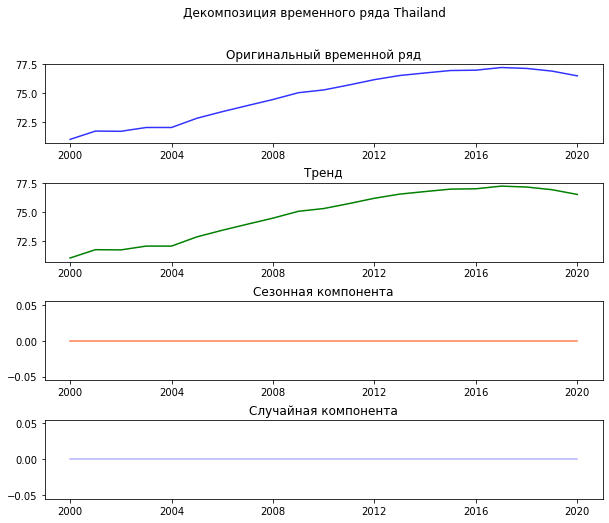

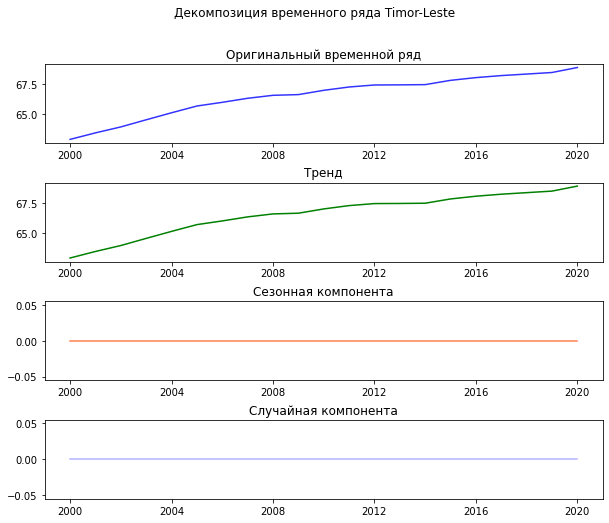

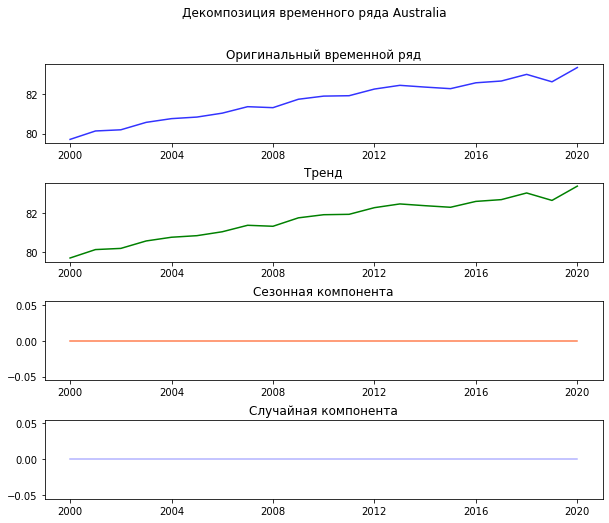

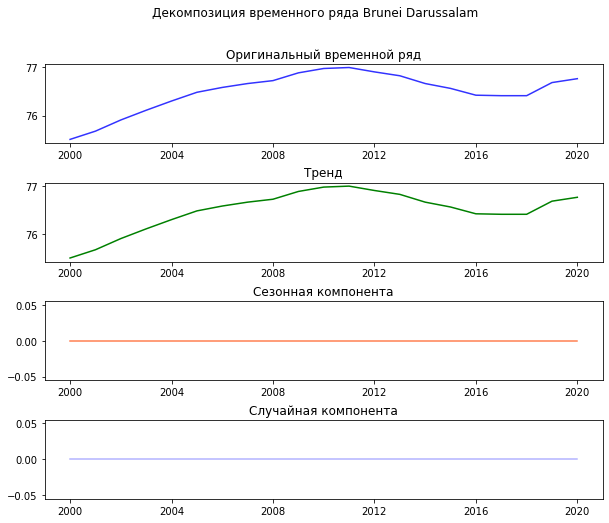

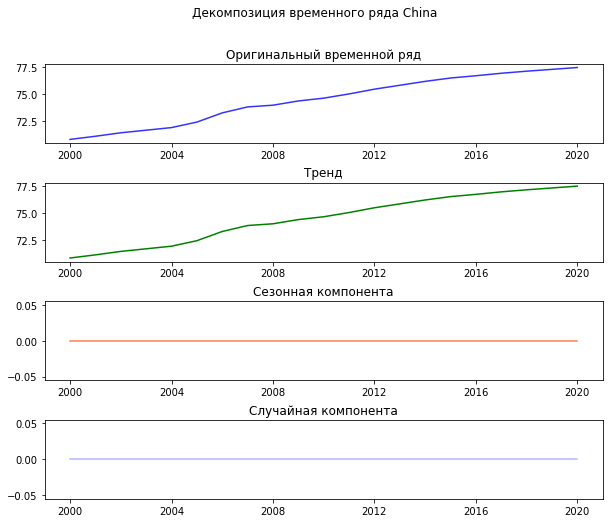

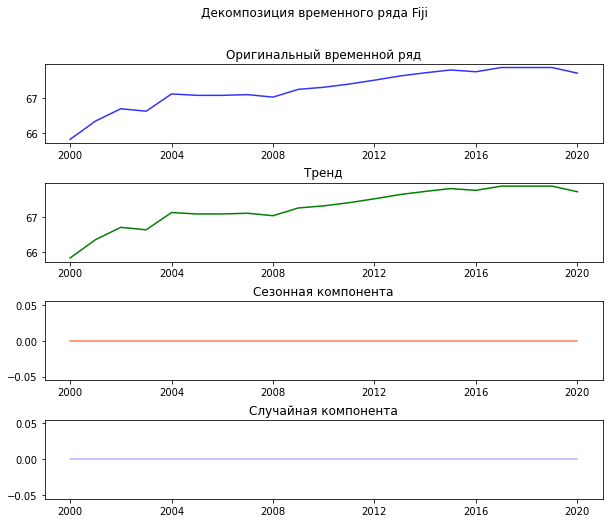

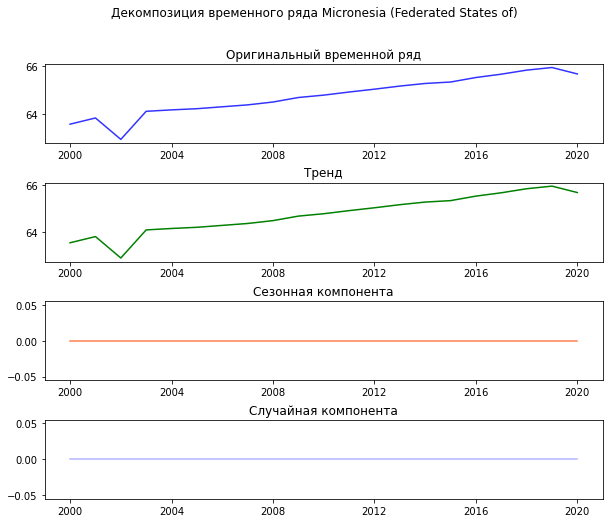

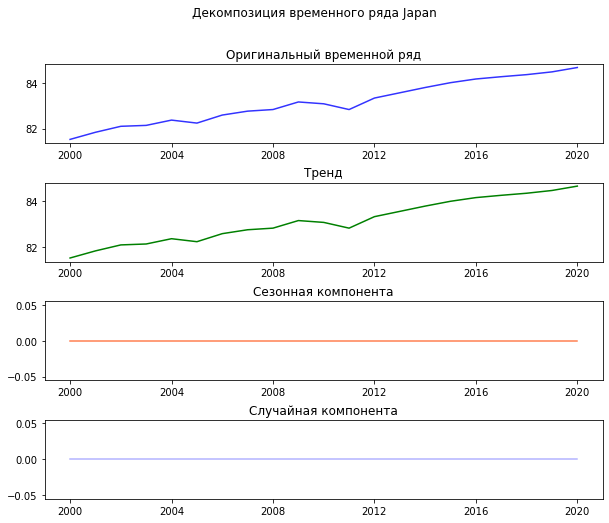

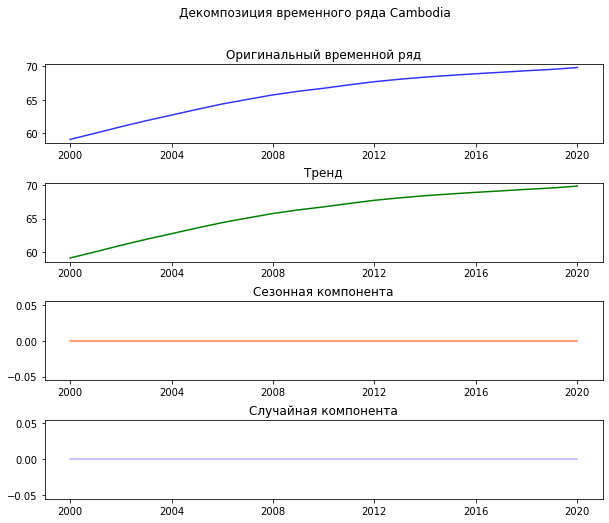

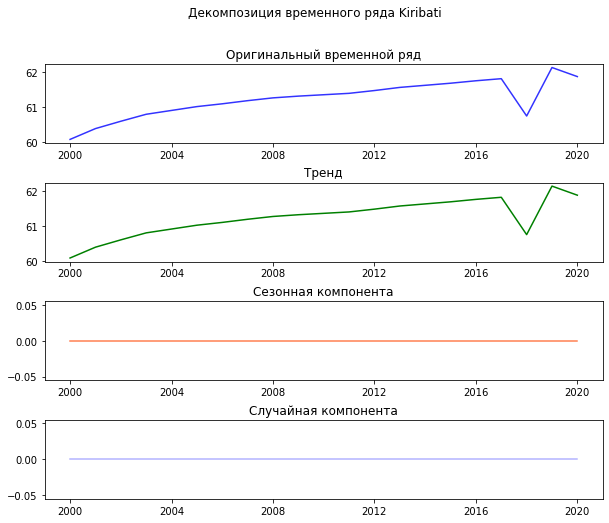

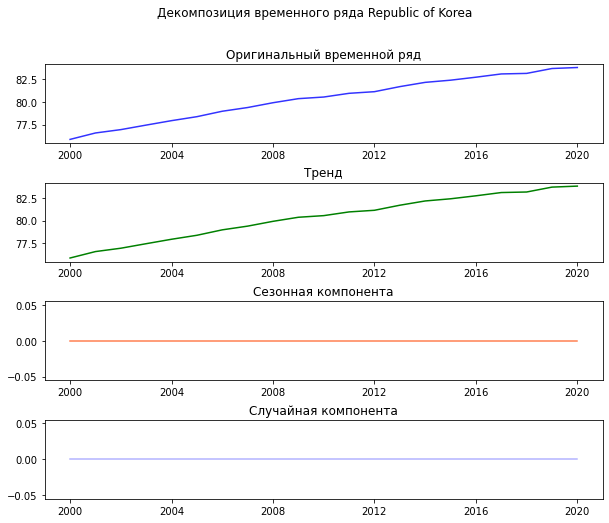

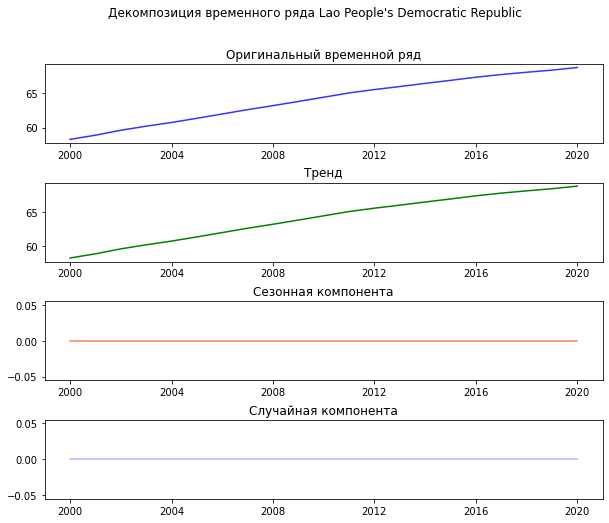

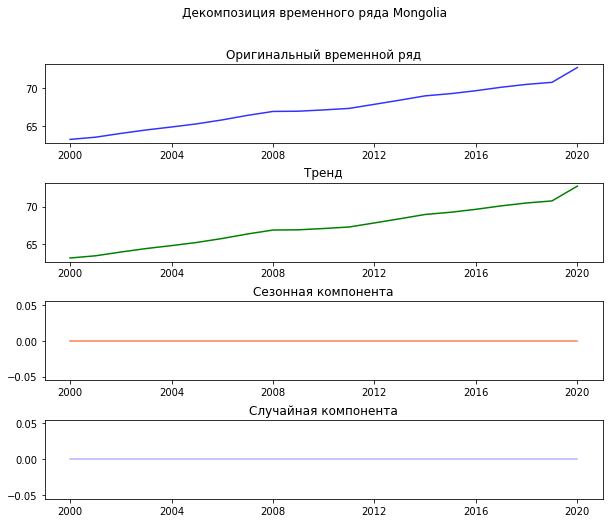

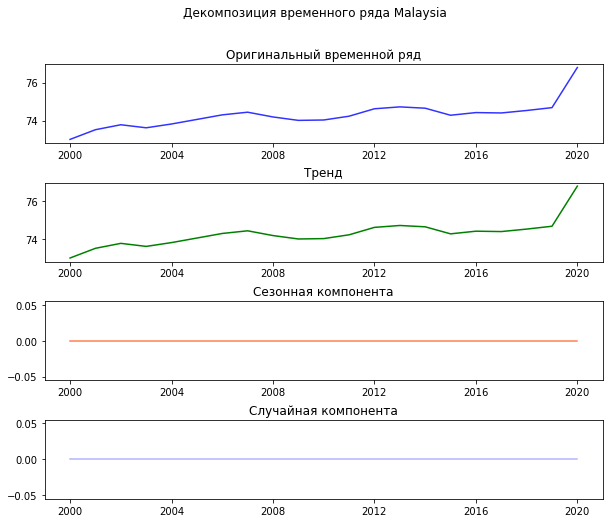

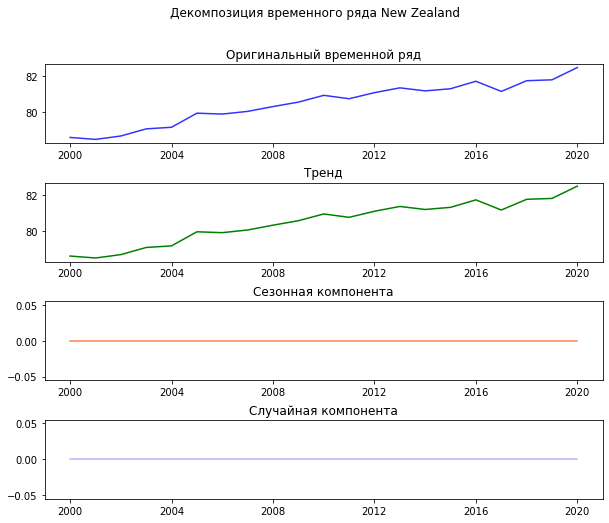

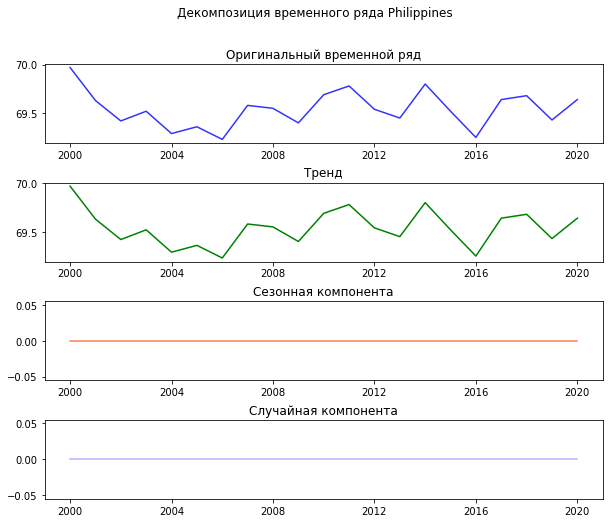

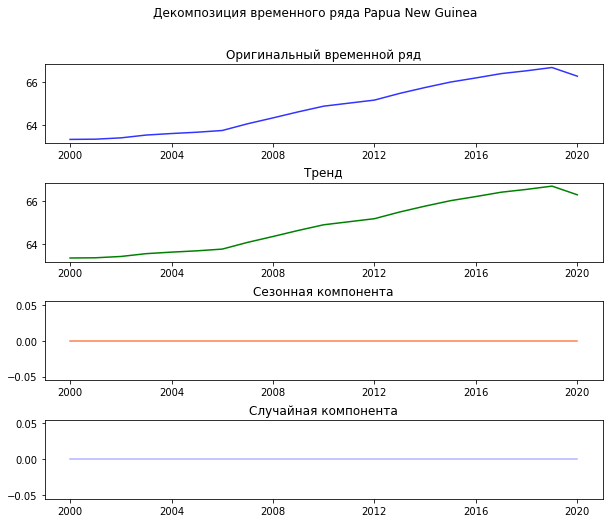

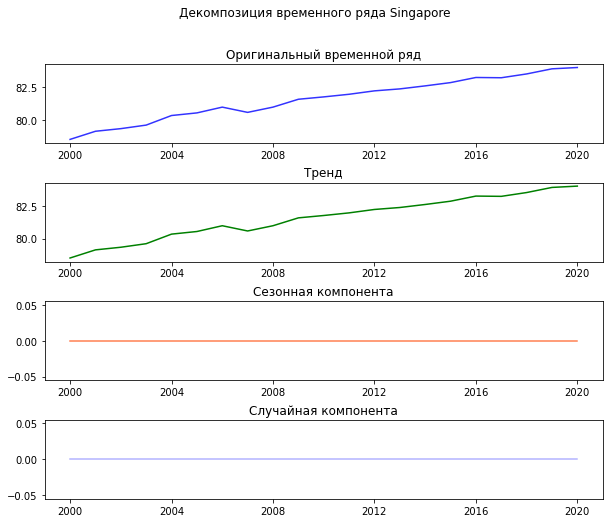

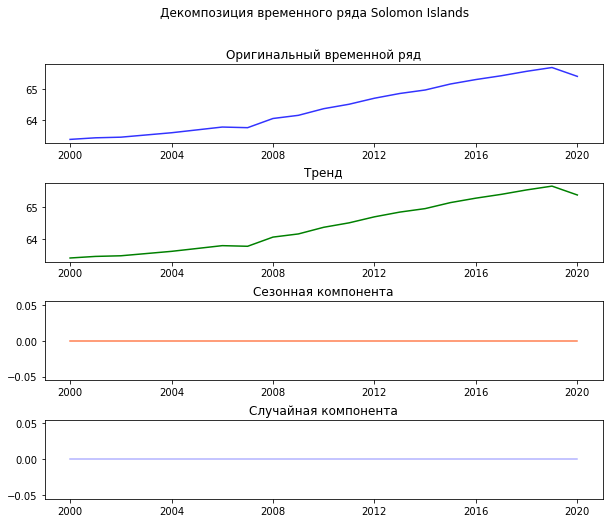

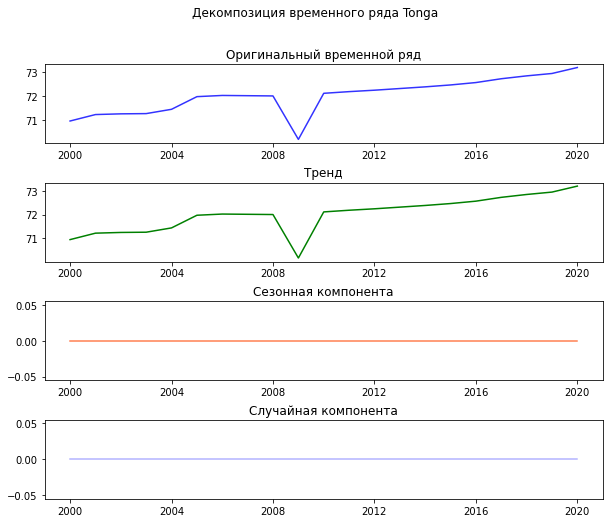

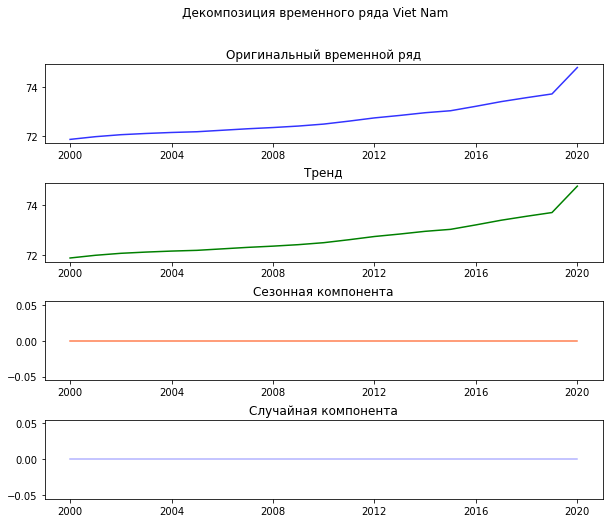

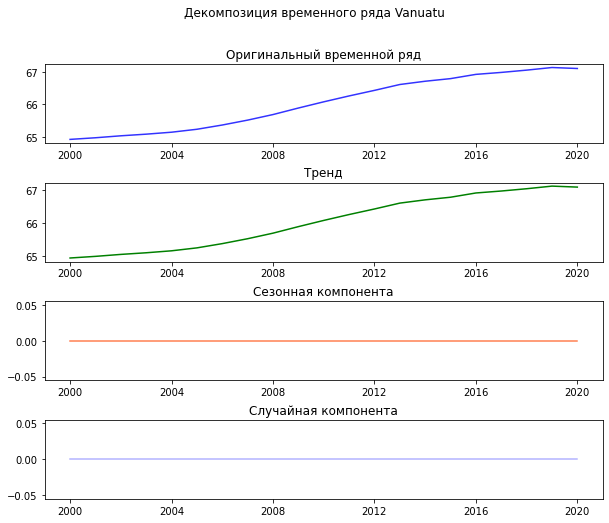

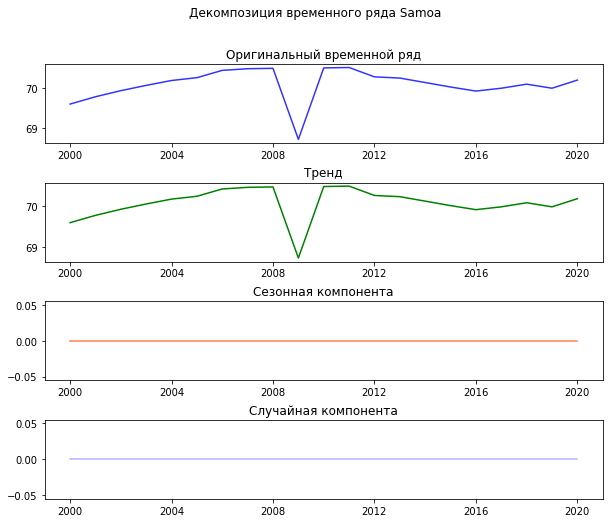

In [4]:
# Коды всех стран
location_codes = get_location_codes(data)

# Для каждой страны построим график декомпозиции
for code in location_codes:
    # Временной ряд для страны
    location_time_series = get_location_time_series(data, code) 
    # Название страны
    location = get_location_by_code(code)   
    
    # Производим декомпозицию временного ряда 
    decomposition = seasonal_decompose(location_time_series, period=1)

    # Строим графики составляющих
    fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(10, 8))
    plt.subplots_adjust(hspace=.5)

    axs[0].plot(location_time_series, color='blue', alpha=0.8)
    axs[0].set_title('Оригинальный временной ряд')

    axs[1].plot(decomposition.trend, color='green')
    axs[1].set_title('Тренд')

    axs[2].plot(decomposition.seasonal, color='coral')
    axs[2].set_title('Сезонная компонента')

    axs[3].plot(decomposition.resid, color='blue', alpha=0.3)
    axs[3].set_title('Случайная компонента')

    plt.suptitle(f'Декомпозиция временного ряда {location}')
    plt.show()

В данных временных рядов продолжительности жизни по отдельным странам наблюдается только тренд.\
Преимущественно возрастающий.